# Diet and the Curse of Diabetes

predicting risk of diabetes with dietary and BMI data

## Introduction

Diabetes mellitus is a major healthcare concern and a leading cause of impaired quality of life, desease, and death in the United States and other developed countries. This project aims to predict risk of diabetes from dietary information and bmi. This project also aims to shed some new light into the dietary cause of diabetes.

The data is obtained from the 2015-2016 National Health and Nutrition Examination Survey(NHANES): https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=2015.
The survey provides a comprehensive nation-wide diet and health information, including 1/2-day diet recall, blood test results, body examination, etc.
In this project, the demographics, nutrition survey, lab test results, and body examination information was utilized to attempt to identify underlying cause of diabetes.

#### Results
According to the result of the project, age and BMI are the two most important features that can distinguish whether a person is (pre)diabetic. No strong insight regarding dietary information is being consistently produced by the models created. One of the potential reasons for the inability to produce viable conclusion on diet is the inherent limitations of the self-report dietary data.

To weed out useless information, various data visualization techniques are used during exploratory analysis and domain-knowledge inspired data-cleaning. Several interaction features such as "glycemic_impact" are created to augment the effects of certain diets such as low-fat diet and ketogenic diet. Dummy variables are created for categorical data. PCA and Cross validation are used during model training to avoid overfitting.

#### Motivation
As a former student in health and medicine, improving the health of the population has always been one of my life-long goal. To be able to help identify the cause of a wide-spread diesease in a small representative sample of American population may have a profound influence on the healthcare community. Not only is it relevant to myself, several of whose relatives are affliceted by type-2 diabetes, it would also help improving the quality of life and health of the population in developed and developing countries alike.

## Library Imports

In [4]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

## Exploratory Analysis
### &
## Data Cleaning

#### Demographics Data

In [6]:
demo_data = pd.read_sas('demographics/DEMO_I.XPT')

In [7]:
# makes a copy and start exploring data
demo = demo_data.copy()
print(demo.shape)
demo.head()

(9971, 47)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.00,9.00,2.00,1.00,62.00,nan,3.00,3.00,1.00,nan,2.00,nan,1.00,1.00,nan,nan,5.00,1.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,0.00,0.00,1.00,1.00,62.00,1.00,5.00,1.00,3.00,134671.37,135629.51,1.00,125.00,10.00,10.00,4.39
1,83733.00,9.00,2.00,1.00,53.00,nan,3.00,3.00,1.00,nan,2.00,nan,2.00,2.00,7.00,nan,3.00,3.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,53.00,2.00,3.00,3.00,nan,24328.56,25282.43,1.00,125.00,4.00,4.00,1.32
2,83734.00,9.00,2.00,1.00,78.00,nan,3.00,3.00,2.00,nan,1.00,2.00,1.00,1.00,nan,nan,3.00,1.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,nan,2.00,2.00,0.00,0.00,2.00,2.00,79.00,1.00,3.00,1.00,3.00,12400.01,12575.84,1.00,131.00,5.00,5.00,1.51
3,83735.00,9.00,2.00,2.00,56.00,nan,3.00,3.00,2.00,nan,2.00,nan,1.00,1.00,nan,nan,5.00,6.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,2.00,56.00,1.00,5.00,6.00,nan,102718.00,102078.63,1.00,131.00,10.00,10.00,5.00
4,83736.00,9.00,2.00,2.00,42.00,nan,4.00,4.00,2.00,nan,2.00,nan,1.00,1.00,nan,nan,4.00,3.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,5.00,5.00,0.00,2.00,0.00,2.00,42.00,1.00,4.00,3.00,nan,17627.67,18234.74,2.00,126.00,7.00,7.00,1.23


In [8]:
# set index with SEQN (Respondent sequence number)
demo = demo.set_index('SEQN')
demo.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,9.00,2.00,1.00,62.00,nan,3.00,3.00,1.00,nan,2.00,nan,1.00,1.00,nan,nan,5.00,1.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,0.00,0.00,1.00,1.00,62.00,1.00,5.00,1.00,3.00,134671.37,135629.51,1.00,125.00,10.00,10.00,4.39
83733.00,9.00,2.00,1.00,53.00,nan,3.00,3.00,1.00,nan,2.00,nan,2.00,2.00,7.00,nan,3.00,3.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,53.00,2.00,3.00,3.00,nan,24328.56,25282.43,1.00,125.00,4.00,4.00,1.32
83734.00,9.00,2.00,1.00,78.00,nan,3.00,3.00,2.00,nan,1.00,2.00,1.00,1.00,nan,nan,3.00,1.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,nan,2.00,2.00,0.00,0.00,2.00,2.00,79.00,1.00,3.00,1.00,3.00,12400.01,12575.84,1.00,131.00,5.00,5.00,1.51
83735.00,9.00,2.00,2.00,56.00,nan,3.00,3.00,2.00,nan,2.00,nan,1.00,1.00,nan,nan,5.00,6.00,nan,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,2.00,56.00,1.00,5.00,6.00,nan,102718.00,102078.63,1.00,131.00,10.00,10.00,5.00
83736.00,9.00,2.00,2.00,42.00,nan,4.00,4.00,2.00,nan,2.00,nan,1.00,1.00,nan,nan,4.00,3.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,5.00,5.00,0.00,2.00,0.00,2.00,42.00,1.00,4.00,3.00,nan,17627.67,18234.74,2.00,126.00,7.00,7.00,1.23


In [9]:
# only age, gender, and ethnicity are important
# for diet-based diabetes prediction
# Remaining features are discarded
demo = demo[['RIAGENDR', 'RIDAGEYR', 'RIDRETH3']]
demo.shape

(9971, 3)

In [10]:
demo.isnull().sum()

RIAGENDR    0
RIDAGEYR    0
RIDRETH3    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215E541FB70>,
      dtype=object)

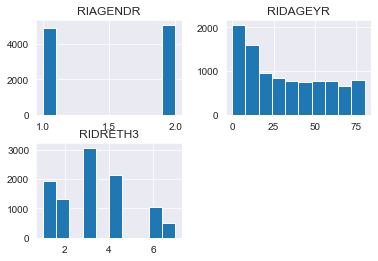

In [11]:
demo.hist()

In [12]:
demo['gender'] = demo.RIAGENDR
demo['age'] = demo.RIDAGEYR
demo['race'] = demo.RIDRETH3
demo.head()

,RIAGENDR,RIDAGEYR,RIDRETH3,gender,age,race
SEQN,,,,,,
83732.00,1.00,62.00,3.00,1.00,62.00,3.00
83733.00,1.00,53.00,3.00,1.00,53.00,3.00
83734.00,1.00,78.00,3.00,1.00,78.00,3.00
83735.00,2.00,56.00,3.00,2.00,56.00,3.00
83736.00,2.00,42.00,4.00,2.00,42.00,4.00


In [13]:
demo.drop(['RIAGENDR', 'RIDAGEYR', 'RIDRETH3'], axis=1, inplace=True)
demo.gender = demo.gender.astype(int)
demo.age = demo.age.astype(int)
demo.race = demo.race.astype(int)

In [14]:
demo.head()

,gender,age,race
SEQN,,,
83732.00,1,62,3
83733.00,1,53,3
83734.00,1,78,3
83735.00,2,56,3
83736.00,2,42,4


In [15]:
demo.race.replace({
    1: 'mexian_american',
    2: 'other_hispanic',
    3: 'white',
    4: 'black',
    6: 'asian',
    7: 'other'
}, inplace=True)

demo.head(10)

,gender,age,race
SEQN,,,
83732.00,1,62,white
83733.00,1,53,white
83734.00,1,78,white
83735.00,2,56,white
83736.00,2,42,black
83737.00,2,72,mexian_american
83738.00,2,11,mexian_american
83739.00,1,4,white
83740.00,1,1,other_hispanic


#### First Day Nutrient Data

In [16]:
first_nutrient_data = pd.read_sas('diet/DR1TOT_I.XPT')

In [17]:
# makes a copy and start exploring data
nutr1 = first_nutrient_data.copy()
print(nutr1.shape)
nutr1.head()

(9544, 168)


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_300,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,83732.00,92670.70,69945.93,1.00,71.00,2.00,2.00,-1.00,1.00,1.00,1.00,12.00,1.00,3.00,3.00,1.00,1.00,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,17.00,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,10.59,0.00,230.00,307.00,336.00,624.00,282.00,1206.00,1120.00,2.34,1.95,20.40,2.28,450.00,163.00,286.00,564.00,290.70,1.89,0.00,110.50,2.60,139.00,623.00,1052.00,255.00,16.01,8.73,1.10,5298.00,2641.00,113.60,360.00,0.00,0.00,3028.29,0.01,0.01,0.05,0.09,0.37,1.27,13.20,7.33,1.58,28.94,0.33,0.28,16.02,2.29,0.00,0.11,0.00,0.02,0.00,2.00,960.00,120.00,840.00,2.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,1.00,2.00,nan,2.00,nan,2.00,1.00,1.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00
1,83733.00,16454.11,13190.27,1.00,61.00,2.00,2.00,17.00,7.00,1.00,1.00,12.00,4.00,nan,2.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.00,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,4.19,0.00,352.00,453.00,405.00,966.00,20.00,0.00,1279.00,1.86,2.48,29.44,1.82,478.00,112.00,365.00,556.00,672.70,2.92,0.00,30.20,4.60,87.60,594.00,1414.00,262.00,11.01,4.82,0.57,3164.00,2249.00,89.90,192.00,0.00,89.30,4024.25,0.56,0.44,0.28,0.76,0.86,2.69,13.23,6.14,0.69,17.84,0.15,0.00,16.71,2.14,0.00,0.21,0.01,0.03,0.04,2.00,507.00,0.00,507.00,4.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,2.00,2.00,nan,2.00,nan,2.00,1.00,2.00,nan,2.00,nan,2.00,nan,1.00,4.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,4.00,2.00,nan,2.00
2,83734.00,6529.62,4928.42,1.00,14.00,2.00,2.00,6.00,7.00,1.00,1.00,12.00,1.00,3.00,4.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,14.00,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,11.62,0.00,349.00,555.00,13.00,2253.00,548.00,29458.00,774.00,2.78,2.41,27.71,3.12,553.00,65.00,488.00,599.00,638.60,2.35,0.00,86.90,4.70,124.20,872.00,1527.00,497.00,26.17,14.09,2.41,5659.00,5154.00,140.90,306.00,0.00,0.00,3008.08,0.03,0.03,0.15,0.19,0.91,0.78,13.66,6.79,0.92,27.11,0.42,0.02,28.41,3.36,0.00,0.36,0.01,0.03,0.06,1.00,870.00,870.00,0.00,1.00,1.00,1.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.

In [18]:
nutr1 = nutr1.drop_duplicates()
nutr1.shape

(9544, 168)

In [19]:
nutr1 = nutr1.set_index('SEQN')
nutr1.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_300,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,71.00,2.00,2.00,-1.00,1.00,1.00,1.00,12.00,1.00,3.00,3.00,1.00,1.00,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,17.00,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,10.59,0.00,230.00,307.00,336.00,624.00,282.00,1206.00,1120.00,2.34,1.95,20.40,2.28,450.00,163.00,286.00,564.00,290.70,1.89,0.00,110.50,2.60,139.00,623.00,1052.00,255.00,16.01,8.73,1.10,5298.00,2641.00,113.60,360.00,0.00,0.00,3028.29,0.01,0.01,0.05,0.09,0.37,1.27,13.20,7.33,1.58,28.94,0.33,0.28,16.02,2.29,0.00,0.11,0.00,0.02,0.00,2.00,960.00,120.00,840.00,2.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,1.00,2.00,nan,2.00,nan,2.00,1.00,1.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00
83733.00,16454.11,13190.27,1.00,61.00,2.00,2.00,17.00,7.00,1.00,1.00,12.00,4.00,nan,2.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.00,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,4.19,0.00,352.00,453.00,405.00,966.00,20.00,0.00,1279.00,1.86,2.48,29.44,1.82,478.00,112.00,365.00,556.00,672.70,2.92,0.00,30.20,4.60,87.60,594.00,1414.00,262.00,11.01,4.82,0.57,3164.00,2249.00,89.90,192.00,0.00,89.30,4024.25,0.56,0.44,0.28,0.76,0.86,2.69,13.23,6.14,0.69,17.84,0.15,0.00,16.71,2.14,0.00,0.21,0.01,0.03,0.04,2.00,507.00,0.00,507.00,4.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,2.00,2.00,nan,2.00,nan,2.00,1.00,2.00,nan,2.00,nan,2.00,nan,1.00,4.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,4.00,2.00,nan,2.00
83734.00,6529.62,4928.42,1.00,14.00,2.00,2.00,6.00,7.00,1.00,1.00,12.00,1.00,3.00,4.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,14.00,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,11.62,0.00,349.00,555.00,13.00,2253.00,548.00,29458.00,774.00,2.78,2.41,27.71,3.12,553.00,65.00,488.00,599.00,638.60,2.35,0.00,86.90,4.70,124.20,872.00,1527.00,497.00,26.17,14.09,2.41,5659.00,5154.00,140.90,306.00,0.00,0.00,3008.08,0.03,0.03,0.15,0.19,0.91,0.78,13.66,6.79,0.92,27.11,0.42,0.02,28.41,3.36,0.00,0.36,0.01,0.03,0.06,1.00,870.00,870.00,0.00,1.00,1.00,1.00,1.00,2.00,nan,2.00,nan,2.00,nan,2.00,nan,1.00,

In [20]:
nutr1.columns

Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MRESP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167)

In [21]:
# drops irrelevant features, keeping only those essential to diet types,
# distribution of macronutrients intake, food folate(indicator of vegetables),
# and data quality

nutr1_features = list(nutr1.columns)
print(nutr1_features)

['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR1SKY', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1TM181', 'D

In [22]:
print(nutr1_features.index('DR1TCHOL'), 'Cholesterol Index')

40 Cholesterol Index


In [23]:
nutr1_trim = nutr1[nutr1_features[:41]]
nutr1_trim.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,71.00,2.00,2.00,-1.00,1.00,1.00,1.00,12.00,1.00,3.00,3.00,1.00,1.00,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,17.00,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00
83733.00,16454.11,13190.27,1.00,61.00,2.00,2.00,17.00,7.00,1.00,1.00,12.00,4.00,nan,2.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.00,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00
83734.00,6529.62,4928.42,1.00,14.00,2.00,2.00,6.00,7.00,1.00,1.00,12.00,1.00,3.00,4.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,14.00,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00
83735.00,58191.54,0.00,1.00,22.00,2.00,1.00,15.00,6.00,1.00,1.00,12.00,1.00,2.00,2.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.00,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00
83736.00,12358.09,9813.68,1.00,73.00,2.00,2.00,2.00,7.00,1.00,1.00,12.00,1.00,1.00,4.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.00,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00


In [24]:
# merges with food folate data
nutr1_trim = nutr1_trim.join(nutr1.DR1TFF)
nutr1_trim.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TFF
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,71.00,2.00,2.00,-1.00,1.00,1.00,1.00,12.00,1.00,3.00,3.00,1.00,1.00,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,17.00,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00
83733.00,16454.11,13190.27,1.00,61.00,2.00,2.00,17.00,7.00,1.00,1.00,12.00,4.00,nan,2.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.00,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00
83734.00,6529.62,4928.42,1.00,14.00,2.00,2.00,6.00,7.00,1.00,1.00,12.00,1.00,3.00,4.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,14.00,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00
83735.00,58191.54,0.00,1.00,22.00,2.00,1.00,15.00,6.00,1.00,1.00,12.00,1.00,2.00,2.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.00,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00
83736.00,12358.09,9813.68,1.00,73.00,2.00,2.00,2.00,7.00,1.00,1.00,12.00,1.00,1.00,4.00,2.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.00,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00


In [25]:
nutr1_features = list(nutr1_trim.columns)
print('Irrelevant Start', nutr1_features.index('DR1EXMER'))
print('End', nutr1_features.index('DRQSDIET'))

Irrelevant Start 3
End 16


In [26]:
nutr1_features[3:17]

['DR1EXMER',
 'DRABF',
 'DRDINT',
 'DR1DBIH',
 'DR1DAY',
 'DR1LANG',
 'DR1MRESP',
 'DR1HELP',
 'DBQ095Z',
 'DBD100',
 'DRQSPREP',
 'DR1STY',
 'DR1SKY',
 'DRQSDIET']

In [27]:
# drops remaining irrelevant features
nutr1_trim.drop(nutr1_features[3:17], axis=1, inplace=True)
nutr1_trim.drop(['DRQSDT91', 'DR1TNUMF'], axis=1, inplace=True)
print(nutr1_trim.shape)
nutr1_trim.head()

(9544, 26)


,WTDRD1,WTDR2D,DR1DRSTZ,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TFF
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00
83733.00,16454.11,13190.27,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00
83734.00,6529.62,4928.42,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00
83735.00,58191.54,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00
83736.00,12358.09,9813.68,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00


In [28]:
nutr1_trim.isnull().sum()

WTDRD1         0
WTDR2D      1038
DR1DRSTZ       0
DRQSDT1     9075
DRQSDT2     9428
DRQSDT3     9422
DRQSDT4     9498
DRQSDT5     9542
DRQSDT6     9537
DRQSDT7     9396
DRQSDT8     9515
DRQSDT9     9479
DRQSDT10    9526
DRQSDT11    9530
DRQSDT12    9539
DR1TKCAL    1217
DR1TPROT    1217
DR1TCARB    1217
DR1TSUGR    1217
DR1TFIBE    1217
DR1TTFAT    1217
DR1TSFAT    1217
DR1TMFAT    1217
DR1TPFAT    1217
DR1TCHOL    1217
DR1TFF      1217
dtype: int64

In [29]:
# deal with NaN in diet type first, 
# handle remaining missing data after merging all data
for i in range(1, 13):
    nutr1_trim['DRQSDT{}'.format(i)].fillna(0, inplace=True)
nutr1_trim.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TFF
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00
83733.00,16454.11,13190.27,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00
83734.00,6529.62,4928.42,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00
83735.00,58191.54,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00
83736.00,12358.09,9813.68,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00


In [30]:
for i in range(1, 13):
    nutr1_trim['DRQSDT{}'.format(i)] = nutr1_trim['DRQSDT{}'.format(i)].astype(int)
nutr1_trim.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TFF
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00
83733.00,16454.11,13190.27,1.00,0,0,0,0,0,0,0,0,0,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00
83734.00,6529.62,4928.42,1.00,1,0,0,0,0,0,0,0,0,0,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00
83735.00,58191.54,0.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00
83736.00,12358.09,9813.68,1.00,0,0,0,0,0,0,0,0,0,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00


In [31]:
# change feature names to human-readable names
translate = {
    'WTDRD1':'weight_1',
    'WTDR2D':'weight_2',
    'DR1DRSTZ':'status_1',
    'DRQSDT1':'low_cal',
    'DRQSDT2':'low_fat',
    'DRQSDT3':'low_salt',
    'DRQSDT4':'low_sugar',
    'DRQSDT5':'low_fiber',
    'DRQSDT6':'high_fiber',
    'DRQSDT7':'diabetic_diet',
    'DRQSDT8':'mass_gain',
    'DRQSDT9':'low_carb',
    'DRQSDT10':'high_prot',
    'DRQSDT11':'glut_free',
    'DRQSDT12':'renal_diet',
    'DR1TKCAL':'energy_1',
    'DR1TPROT':'protein_1',
    'DR1TCARB':'carb_1',
    'DR1TSUGR':'sugar_1',
    'DR1TFIBE':'fiber_1',
    'DR1TTFAT':'fat_1',
    'DR1TSFAT':'satur_1',
    'DR1TMFAT':'mono_1',
    'DR1TPFAT':'poly_1',
    'DR1TCHOL':'chole_1',
    'DR1TFF':'folate_1'
}

for name, val in translate.items():
    nutr1_trim[val] = nutr1_trim[name]
    nutr1_trim.drop(name, axis=1, inplace=True)
    
nutr1_trim.head()

,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00
83733.00,16454.11,13190.27,1.00,0,0,0,0,0,0,0,0,0,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00
83734.00,6529.62,4928.42,1.00,1,0,0,0,0,0,0,0,0,0,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00
83735.00,58191.54,0.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00
83736.00,12358.09,9813.68,1.00,0,0,0,0,0,0,0,0,0,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00


#### Second Day Nutrient Data

In [32]:
sec_nutrient_data = pd.read_sas('diet/DR2TOT_I.XPT')

In [33]:
# makes a copy and start exploring data
nutr2 = sec_nutrient_data.copy()
print(nutr2.shape)
nutr2.head()

(9544, 85)


,SEQN,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DR2TNUMF,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TATOA,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TB12A,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TCAFF,DR2TTHEO,DR2TALCO,DR2TMOIS,DR2TS040,DR2TS060,DR2TS080,DR2TS100,DR2TS120,DR2TS140,DR2TS160,DR2TS180,DR2TM161,DR2TM181,DR2TM201,DR2TM221,DR2TP182,DR2TP183,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWS
0,83732.00,92670.70,69945.93,1.00,87.00,2.00,2.00,2.00,4.00,1.00,1.00,12.00,25.00,1.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,8.62,0.00,494.00,996.00,91.00,5970.00,42.00,1715.00,8474.00,2.03,3.29,35.66,3.28,395.00,160.00,235.00,507.00,540.40,7.01,0.00,64.60,9.60,533.40,1433.00,1880.00,334.00,15.67,15.09,1.26,4431.00,3774.00,167.80,171.00,7.00,0.00,3694.92,0.55,0.43,0.46,0.55,0.66,3.08,22.63,10.66,2.02,39.04,0.49,0.11,23.15,2.93,0.00,0.35,0.01,0.03,0.06,2.00,1440.00,480.00,960.00,2.00
1,83733.00,16454.11,13190.27,1.00,87.00,2.00,2.00,20.00,3.00,1.00,1.00,12.00,13.00,2.00,nan,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,17.82,0.00,231.00,296.00,144.00,644.00,108.00,3165.00,1133.00,1.93,2.81,43.70,3.07,529.00,126.00,403.00,617.00,1105.80,18.44,0.00,27.90,3.20,139.40,629.00,2662.00,524.00,15.95,9.30,1.21,4653.00,4915.00,153.50,180.00,0.00,144.90,5223.07,0.46,0.28,0.17,0.37,0.39,1.52,21.24,7.60,1.65,58.09,0.92,0.03,39.91,4.94,0.02,0.50,0.14,0.12,0.49,2.00,480.00,0.00,480.00,4.00
2,83734.00,6529.62,4928.42,1.00,43.00,2.00,2.00,9.00,3.00,1.00,5.00,12.00,15.00,2.00,nan,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,4.41,0.00,569.00,625.00,27.00,615.00,51.00,3383.00,226.00,0.96,4.83,21.31,1.74,199.00,83.00,117.00,256.00,391.00,5.48,0.00,23.40,0.30,63.90,887.00,1348.00,277.00,14.61,16.64,1.60,2625.00,2726.00,97.40,228.00,216.00,0.00,2096.38,1.19,0.92,0.50,1.07,1.42,4.64,19.09,9.61,1.59,27.46,0.22,0.02,9.09,1.02,0.06,0.15,0.01,0.04,0.00,2.00,720.00,720.00,0.00,1.00
3,83735.00,58191.54,0.00,5.00,nan,2.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,83736.00,12358.09,9813.68,1.00,87.00,2.00,2.00,6.00,4.00,1.00,1.00,12.00,8.00,2.00,nan,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,1.87,0.00,210.00,227.00,11.00,144.00,111.00,1051.00,144.00,0.59,0.30,11.57,0.59,134.00,92.00,42.00,199.00,95.20,0.67,0.00,52.70,0.10,6.80,116.00,431.00,58.00,3.41,3.05,0.29,1924.00,694.00,51.90,22.00,0.00,0.00,822.95,0.92,0.57,0.34,0.72,0.74,2.32,11.28,4.70,1.27,16.30,0.19,0.01,5.19,0.53,0.00,0.08,0.00,0.01,0.00,2.00,0.00,0.00,0.00,4.00


In [34]:
nutr2.drop_duplicates(inplace=True)
nutr2.shape

(9544, 85)

In [35]:
nutr2 = nutr2.set_index('SEQN')
nutr2.head()

,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DR2TNUMF,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TATOA,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TB12A,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TCAFF,DR2TTHEO,DR2TALCO,DR2TMOIS,DR2TS040,DR2TS060,DR2TS080,DR2TS100,DR2TS120,DR2TS140,DR2TS160,DR2TS180,DR2TM161,DR2TM181,DR2TM201,DR2TM221,DR2TP182,DR2TP183,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWS
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,87.00,2.00,2.00,2.00,4.00,1.00,1.00,12.00,25.00,1.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,8.62,0.00,494.00,996.00,91.00,5970.00,42.00,1715.00,8474.00,2.03,3.29,35.66,3.28,395.00,160.00,235.00,507.00,540.40,7.01,0.00,64.60,9.60,533.40,1433.00,1880.00,334.00,15.67,15.09,1.26,4431.00,3774.00,167.80,171.00,7.00,0.00,3694.92,0.55,0.43,0.46,0.55,0.66,3.08,22.63,10.66,2.02,39.04,0.49,0.11,23.15,2.93,0.00,0.35,0.01,0.03,0.06,2.00,1440.00,480.00,960.00,2.00
83733.00,16454.11,13190.27,1.00,87.00,2.00,2.00,20.00,3.00,1.00,1.00,12.00,13.00,2.00,nan,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,17.82,0.00,231.00,296.00,144.00,644.00,108.00,3165.00,1133.00,1.93,2.81,43.70,3.07,529.00,126.00,403.00,617.00,1105.80,18.44,0.00,27.90,3.20,139.40,629.00,2662.00,524.00,15.95,9.30,1.21,4653.00,4915.00,153.50,180.00,0.00,144.90,5223.07,0.46,0.28,0.17,0.37,0.39,1.52,21.24,7.60,1.65,58.09,0.92,0.03,39.91,4.94,0.02,0.50,0.14,0.12,0.49,2.00,480.00,0.00,480.00,4.00
83734.00,6529.62,4928.42,1.00,43.00,2.00,2.00,9.00,3.00,1.00,5.00,12.00,15.00,2.00,nan,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,4.41,0.00,569.00,625.00,27.00,615.00,51.00,3383.00,226.00,0.96,4.83,21.31,1.74,199.00,83.00,117.00,256.00,391.00,5.48,0.00,23.40,0.30,63.90,887.00,1348.00,277.00,14.61,16.64,1.60,2625.00,2726.00,97.40,228.00,216.00,0.00,2096.38,1.19,0.92,0.50,1.07,1.42,4.64,19.09,9.61,1.59,27.46,0.22,0.02,9.09,1.02,0.06,0.15,0.01,0.04,0.00,2.00,720.00,720.00,0.00,1.00
83735.00,58191.54,0.00,5.00,nan,2.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
83736.00,12358.09,9813.68,1.00,87.00,2.00,2.00,6.00,4.00,1.00,1.00,12.00,8.00,2.00,nan,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,1.87,0.00,210.00,227.00,11.00,144.00,111.00,1051.00,144.00,0.59,0.30,11.57,0.59,134.00,92.00,42.00,199.00,95.20,0.67,0.00,52.70,0.10,6.80,116.00,431.00,58.00,3.41,3.05,0.29,1924.00,694.00,51.90,22.00,0.00,0.00,822.95,0.92,0.57,0.34,0.72,0.74,2.32,11.28,4.70,1.27,16.30,0.19,0.01,5.19,0.53,0.00,0.08,0.00,0.01,0.00,2.00,0.00,0.00,0.00,4.00


In [36]:
nutr2_features = list(nutr2.columns)
print(nutr2_features)

['WTDRD1', 'WTDR2D', 'DR2DRSTZ', 'DR2EXMER', 'DRABF', 'DRDINT', 'DR2DBIH', 'DR2DAY', 'DR2LANG', 'DR2MRESP', 'DR2HELP', 'DR2TNUMF', 'DR2STY', 'DR2SKY', 'DR2TKCAL', 'DR2TPROT', 'DR2TCARB', 'DR2TSUGR', 'DR2TFIBE', 'DR2TTFAT', 'DR2TSFAT', 'DR2TMFAT', 'DR2TPFAT', 'DR2TCHOL', 'DR2TATOC', 'DR2TATOA', 'DR2TRET', 'DR2TVARA', 'DR2TACAR', 'DR2TBCAR', 'DR2TCRYP', 'DR2TLYCO', 'DR2TLZ', 'DR2TVB1', 'DR2TVB2', 'DR2TNIAC', 'DR2TVB6', 'DR2TFOLA', 'DR2TFA', 'DR2TFF', 'DR2TFDFE', 'DR2TCHL', 'DR2TVB12', 'DR2TB12A', 'DR2TVC', 'DR2TVD', 'DR2TVK', 'DR2TCALC', 'DR2TPHOS', 'DR2TMAGN', 'DR2TIRON', 'DR2TZINC', 'DR2TCOPP', 'DR2TSODI', 'DR2TPOTA', 'DR2TSELE', 'DR2TCAFF', 'DR2TTHEO', 'DR2TALCO', 'DR2TMOIS', 'DR2TS040', 'DR2TS060', 'DR2TS080', 'DR2TS100', 'DR2TS120', 'DR2TS140', 'DR2TS160', 'DR2TS180', 'DR2TM161', 'DR2TM181', 'DR2TM201', 'DR2TM221', 'DR2TP182', 'DR2TP183', 'DR2TP184', 'DR2TP204', 'DR2TP205', 'DR2TP225', 'DR2TP226', 'DR2_300', 'DR2_320Z', 'DR2_330Z', 'DR2BWATZ', 'DR2TWS']


In [37]:
cholesterol_index = nutr2_features.index('DR2TCHOL')
nutr2_trim = nutr2[nutr2_features[:cholesterol_index+1]]
print(nutr2_trim.shape)
nutr2_trim.head()

(9544, 24)


,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DR2TNUMF,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL
SEQN,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,87.00,2.00,2.00,2.00,4.00,1.00,1.00,12.00,25.00,1.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00
83733.00,16454.11,13190.27,1.00,87.00,2.00,2.00,20.00,3.00,1.00,1.00,12.00,13.00,2.00,nan,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00
83734.00,6529.62,4928.42,1.00,43.00,2.00,2.00,9.00,3.00,1.00,5.00,12.00,15.00,2.00,nan,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00
83735.00,58191.54,0.00,5.00,nan,2.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
83736.00,12358.09,9813.68,1.00,87.00,2.00,2.00,6.00,4.00,1.00,1.00,12.00,8.00,2.00,nan,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00


In [38]:
# dropping remaining irrelevant features
end_irr = nutr2_features.index('DR2TNUMF') + 1
nutr2_trim.drop(nutr2_features[3:end_irr], axis=1, inplace=True)

C:\Users\const\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
nutr2_trim.drop(['WTDRD1', 'WTDR2D'], axis=1, inplace=True)

# appends folate df
nutr2_trim = nutr2_trim.join(nutr2.DR2TFF)

nutr2_trim.head()

,DR2DRSTZ,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TFF
SEQN,,,,,,,,,,,,,,
83732.00,1.00,1.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00
83733.00,1.00,2.00,nan,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00
83734.00,1.00,2.00,nan,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00
83735.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
83736.00,1.00,2.00,nan,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00


In [40]:
nutr2_trim.drop(['DR2STY', 'DR2SKY'], axis=1, inplace=True)
nutr2_trim.head()

,DR2DRSTZ,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TFF
SEQN,,,,,,,,,,,,
83732.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00
83733.00,1.00,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00
83734.00,1.00,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00
83735.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
83736.00,1.00,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00


In [41]:
nutr2_trim.isnull().sum()

DR2DRSTZ       0
DR2TKCAL    2669
DR2TPROT    2669
DR2TCARB    2669
DR2TSUGR    2669
DR2TFIBE    2669
DR2TTFAT    2669
DR2TSFAT    2669
DR2TMFAT    2669
DR2TPFAT    2669
DR2TCHOL    2669
DR2TFF      2669
dtype: int64

In [42]:
# change feature names to readable ones
translate_2 = {
    'DR2DRSTZ': 'status_2',
    'DR2TKCAL': 'energy_2',
    'DR2TPROT': 'protein_2',
    'DR2TCARB': 'carb_2',
    'DR2TSUGR': 'sugar_2',
    'DR2TFIBE': 'fiber_2',
    'DR2TTFAT': 'fat_2',
    'DR2TSFAT': 'satur_2',
    'DR2TMFAT': 'mono_2',
    'DR2TPFAT': 'poly_2',
    'DR2TCHOL': 'chole_2',
    'DR2TFF': 'folate_2'
}

for name, val in translate_2.items():
    nutr2_trim[val] = nutr2_trim[name]
    nutr2_trim.drop(name, axis=1, inplace=True)
    
nutr2_trim.head()

,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2
SEQN,,,,,,,,,,,,
83732.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00
83733.00,1.00,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00
83734.00,1.00,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00
83735.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
83736.00,1.00,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00


In [43]:
nutr2_trim.head()

,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2
SEQN,,,,,,,,,,,,
83732.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00
83733.00,1.00,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00
83734.00,1.00,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00
83735.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
83736.00,1.00,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00


### Lab Data




**diagnosis threshold source:**
* https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/diagnosis-treatment/drc-20351199

**data contents**
* Glycohemoglobin
* 2-Hour Glucose Tolerance Test
* Fasting Insulin
* Fasting Glucose

##### purpose
Since not all survey participants are involved in all tests, so a target variable indicating whether a person is (pre)diabetic is engineered from various lab tests. By considering the results from multiple tests, the number of meaningful observations is maximized.

In [44]:
glycohemoglobin_data = pd.read_sas('lab/GHB_I.XPT')
tolerance_data = pd.read_sas('lab/OGTT_I.XPT')
insulin_data = pd.read_sas('lab/INS_I.XPT')
fastglucose_data = pd.read_sas('lab/GLU_I.XPT')

Glycohemoglobin

Normal: <5.7%
Prediabetes: 5.7-6.4%
Diabetes: >6.5%

In [45]:
ghg = glycohemoglobin_data.copy()
print(ghg.shape)
ghg.head()

(6744, 2)


,SEQN,LBXGH
0,83732.00,7.00
1,83733.00,5.50
2,83734.00,5.80
3,83735.00,5.60
4,83736.00,5.60


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215E6739F28>]],
      dtype=object)

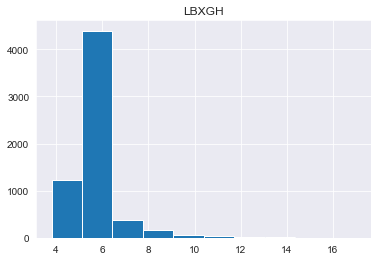

In [46]:
ghg = ghg.set_index('SEQN')
ghg.hist()

In [47]:
ghg.describe()

,LBXGH
count,6326.00
mean,5.75
std,1.10
min,3.80
25%,5.20
50%,5.50
75%,5.80
max,17.00


In [48]:
ghg.LBXGH.unique()

array([ 7. ,  5.5,  5.8,  5.6,  5.9,  5.3,  7.6,  4.8,  6.2,  5.4,  5.7,
        8.6,  nan, 13. ,  5. ,  6.1,  5.1,  6. ,  8.9,  6.5,  6.3, 13.7,
        5.2,  4.6, 10.7,  6.4,  9.9,  6.8,  7.3, 11.2,  8.3,  8.5,  4.2,
       11.7,  4.9,  6.7,  7.8,  9.3,  4.3,  4.5,  6.9,  7.2,  7.4,  8.4,
        9.2,  9.5,  7.9,  9.8,  9.4,  4.7,  6.6, 10.8, 13.3,  4.4,  8.8,
        7.1,  8.2,  7.5, 10. ,  8.1, 10.9,  8.7,  3.8, 10.4, 12.2,  9.6,
       11.3,  9. , 14.3, 13.1, 10.1, 11. ,  7.7, 10.5, 12.3, 14.2,  9.1,
       13.2, 11.8, 11.6, 12.1, 15. , 11.9,  9.7, 12.6,  4. ,  4.1,  8. ,
       14.4, 17. , 10.2, 11.5, 12.4, 15.6, 12. , 10.3, 10.6, 11.4, 12.8,
       13.6, 14.1, 11.1, 12.5, 16.5, 13.4])

In [49]:
ghg.LBXGH.isnull().sum()

418

Oral Glucose Tolerance Test

Normal: <140mg/dL
Pre: 140-200mg/dL
Dia: >200mg/dL

In [50]:
ogtt = tolerance_data.copy()
print(ogtt.shape)
ogtt.head()

(2713, 10)


,SEQN,WTSOG2YR,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,GTDDR2MN,GTXDRANK,GTDCODE
0,83733.00,0.00,nan,nan,nan,nan,nan,nan,nan,27.00
1,83734.00,25618.89,156.00,8.66,1.00,9.00,120.00,111.00,1.00,0.00
2,83736.00,0.00,nan,nan,0.00,3.00,nan,nan,3.00,26.00
3,83737.00,34716.10,99.00,5.50,2.00,6.00,115.00,109.00,1.00,0.00
4,83741.00,131512.70,95.00,5.27,4.00,8.00,129.00,121.00,1.00,0.00


In [51]:
ogtt.describe()

,SEQN,WTSOG2YR,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,GTDDR2MN,GTXDRANK,GTDCODE
count,2713.00,2713.00,2084.00,2084.00,2107.00,2107.00,2086.00,2086.00,2183.00,2713.00
mean,88688.83,98752.44,119.49,6.63,1.93,6.69,118.45,111.81,1.08,5.87
std,2896.91,101691.86,49.59,2.75,1.80,5.31,7.24,4.87,0.38,10.82
min,83733.00,0.00,35.00,1.94,0.00,1.00,69.00,65.00,1.00,0.00
25%,86185.00,36864.67,90.00,5.00,1.00,4.00,114.00,108.00,1.00,0.00
50%,88650.00,65049.72,108.00,6.00,1.00,5.00,116.50,110.00,1.00,0.00
75%,91220.00,111667.14,136.00,7.55,2.00,7.00,121.00,114.00,1.00,0.00
max,93697.00,565055.46,542.00,30.10,11.00,76.00,184.00,138.00,3.00,30.00


In [52]:
ogtt = ogtt.set_index('SEQN')
ogtt.head()

,WTSOG2YR,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,GTDDR2MN,GTXDRANK,GTDCODE
SEQN,,,,,,,,,
83733.00,0.00,nan,nan,nan,nan,nan,nan,nan,27.00
83734.00,25618.89,156.00,8.66,1.00,9.00,120.00,111.00,1.00,0.00
83736.00,0.00,nan,nan,0.00,3.00,nan,nan,3.00,26.00
83737.00,34716.10,99.00,5.50,2.00,6.00,115.00,109.00,1.00,0.00
83741.00,131512.70,95.00,5.27,4.00,8.00,129.00,121.00,1.00,0.00


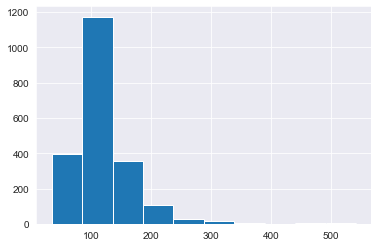

In [53]:
ogtt.LBXGLT.hist()
plt.show()

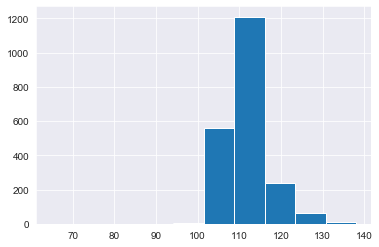

In [54]:
ogtt.GTDDR2MN.hist()
plt.show()

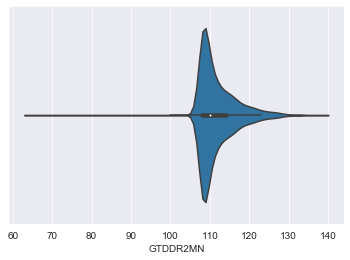

In [55]:
sns.violinplot('GTDDR2MN', data=ogtt)
plt.show()

In [56]:
# drop redundant feature
ogtt.drop(['WTSOG2YR', 'LBDGLTSI', 'GTDSCMMN', 'GTDDR1MN', 'GTDBL2MN'], axis=1, inplace=True)
ogtt.head()

,LBXGLT,GTDDR2MN,GTXDRANK,GTDCODE
SEQN,,,,
83733.00,nan,nan,nan,27.00
83734.00,156.00,111.00,1.00,0.00
83736.00,nan,nan,3.00,26.00
83737.00,99.00,109.00,1.00,0.00
83741.00,95.00,121.00,1.00,0.00


In [57]:
ogtt.describe()

,LBXGLT,GTDDR2MN,GTXDRANK,GTDCODE
count,2084.00,2086.00,2183.00,2713.00
mean,119.49,111.81,1.08,5.87
std,49.59,4.87,0.38,10.82
min,35.00,65.00,1.00,0.00
25%,90.00,108.00,1.00,0.00
50%,108.00,110.00,1.00,0.00
75%,136.00,114.00,1.00,0.00
max,542.00,138.00,3.00,30.00


In [58]:
ogtt['ogtt_complete'] = (ogtt.GTDCODE < 0.001).astype(int)
ogtt['known_diabetic'] = (ogtt.GTDCODE == 22).astype(int)

In [59]:
ogtt.describe()

,LBXGLT,GTDDR2MN,GTXDRANK,GTDCODE,ogtt_complete,known_diabetic
count,2084.00,2086.00,2183.00,2713.00,2713.00,2713.00
mean,119.49,111.81,1.08,5.87,0.77,0.12
std,49.59,4.87,0.38,10.82,0.42,0.32
min,35.00,65.00,1.00,0.00,0.00,0.00
25%,90.00,108.00,1.00,0.00,1.00,0.00
50%,108.00,110.00,1.00,0.00,1.00,0.00
75%,136.00,114.00,1.00,0.00,1.00,0.00
max,542.00,138.00,3.00,30.00,1.00,1.00


In [60]:
ogtt_completed = ogtt[ogtt.ogtt_complete == 1]
ogtt_completed.describe()

,LBXGLT,GTDDR2MN,GTXDRANK,GTDCODE,ogtt_complete,known_diabetic
count,2084.00,2084.00,2084.00,2084.00,2084.00,2084.00
mean,119.49,111.79,1.00,0.00,1.00,0.00
std,49.59,4.84,0.00,0.00,0.00,0.00
min,35.00,65.00,1.00,0.00,1.00,0.00
25%,90.00,108.00,1.00,0.00,1.00,0.00
50%,108.00,110.00,1.00,0.00,1.00,0.00
75%,136.00,114.00,1.00,0.00,1.00,0.00
max,542.00,134.00,1.00,0.00,1.00,0.00


In [61]:
ogtt_completed[ogtt_completed.GTDDR2MN < 100].shape

(2, 6)

In [62]:
# There are two outliers whose test time is under 100min
ogtt_completed[ogtt_completed.GTDDR2MN < 100]

,LBXGLT,GTDDR2MN,GTXDRANK,GTDCODE,ogtt_complete,known_diabetic
SEQN,,,,,,
83855.00,89.00,97.00,1.00,0.00,1,0
92069.00,77.00,65.00,1.00,0.00,1,0


In [63]:
# the two outliers, manage to keep LBXGLT (glucose level) 
# under 140mg/dL in less than 100 min, indicating they are
# not diabetic, and the two observations usable

In [64]:
ogtt.isnull().sum()

LBXGLT            629
GTDDR2MN          627
GTXDRANK          530
GTDCODE             0
ogtt_complete       0
known_diabetic      0
dtype: int64

In [65]:
# Dropping now useless features, renaming useful ones
ogtt.drop(['GTDDR2MN', 'GTXDRANK'], axis=1, inplace=True)
ogtt['two_hr_gluc'] = ogtt.LBXGLT
ogtt.drop('LBXGLT', axis=1, inplace=True)
ogtt.head()

,GTDCODE,ogtt_complete,known_diabetic,two_hr_gluc
SEQN,,,,
83733.00,27.00,0,0,nan
83734.00,0.00,1,0,156.00
83736.00,26.00,0,0,nan
83737.00,0.00,1,0,99.00
83741.00,0.00,1,0,95.00


In [66]:
ogtt.drop('GTDCODE', axis=1, inplace=True)
ogtt.head()

,ogtt_complete,known_diabetic,two_hr_gluc
SEQN,,,
83733.00,0,0,nan
83734.00,1,0,156.00
83736.00,0,0,nan
83737.00,1,0,99.00
83741.00,1,0,95.00


Insulin Data

inconsistent metrics

generally believed >20uU/ml indicates diabetes

In [67]:
insl = insulin_data.copy()
print(insl.shape)
insl.head()

(3191, 7)


,SEQN,WTSAF2YR,LBXIN,LBDINSI,LBDINLC,PHAFSTHR,PHAFSTMN
0,83733.00,54722.34,17.26,103.56,0.00,12.00,2.00
1,83734.00,25471.09,11.77,70.62,0.00,10.00,27.00
2,83736.00,38179.51,5.42,32.52,0.00,10.00,35.00
3,83737.00,25800.85,8.24,49.44,0.00,12.00,25.00
4,83741.00,108751.29,11.39,68.34,0.00,9.00,51.00


In [68]:
insl.describe()

,SEQN,WTSAF2YR,LBXIN,LBDINSI,LBDINLC,PHAFSTHR,PHAFSTMN
count,3191.00,3191.00,2921.00,2921.00,2921.00,3135.00,3135.00
mean,88721.31,83959.69,14.46,86.78,0.00,10.95,30.08
std,2893.58,90417.33,19.68,118.07,0.02,3.59,17.32
min,83733.00,0.00,0.71,4.26,0.00,0.00,0.00
25%,86257.50,30894.85,6.19,37.14,0.00,10.00,15.00
50%,88692.00,53978.57,9.76,58.56,0.00,11.00,31.00
75%,91250.50,93465.69,15.58,93.48,0.00,13.00,45.00
max,93697.00,521632.19,324.06,1944.36,1.00,37.00,59.00


In [69]:
insl = insl.set_index('SEQN')
insl.drop(['PHAFSTMN', 'WTSAF2YR', 'LBDINSI'], axis=1, inplace=True)

In [70]:
insl.head()

,LBXIN,LBDINLC,PHAFSTHR
SEQN,,,
83733.00,17.26,0.00,12.00
83734.00,11.77,0.00,10.00
83736.00,5.42,0.00,10.00
83737.00,8.24,0.00,12.00
83741.00,11.39,0.00,9.00


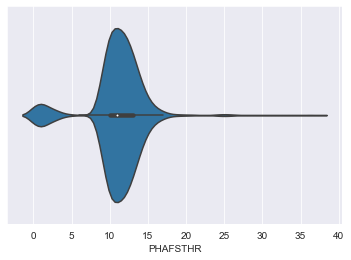

In [71]:
sns.violinplot(insl.PHAFSTHR)
plt.show()

In [72]:
insl[(insl.PHAFSTHR < 9) & (insl.LBDINLC < 0.1)].describe()

,LBXIN,LBDINLC,PHAFSTHR
count,213.00,213.00,213.00
mean,22.18,0.00,1.61
std,28.61,0.00,1.70
min,1.96,0.00,0.00
25%,7.45,0.00,1.00
50%,11.71,0.00,1.00
75%,25.57,0.00,2.00
max,207.32,0.00,8.00


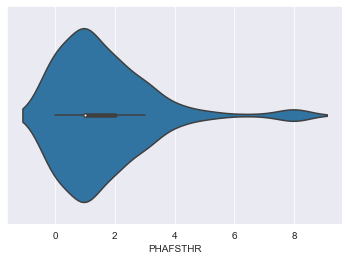

In [73]:
sns.violinplot('PHAFSTHR', data=insl[insl.PHAFSTHR < 9])

In [74]:
# Note: most people whose fasting hours under 9 hours are those
# who had breakfast, so these data can be safely ignored as
# not usable

In [75]:
# marking only those who has faseted for 9+ hours as complete
# dropping useless features
insl['insulin_complete'] = ((insl.LBDINLC < 0.1) & (insl.PHAFSTHR > 9)).astype(int)
insl.drop(['LBDINLC', 'PHAFSTHR'], axis=1, inplace=True)
insl.head()

,LBXIN,insulin_complete
SEQN,,
83733.00,17.26,1
83734.00,11.77,1
83736.00,5.42,1
83737.00,8.24,1
83741.00,11.39,0


In [76]:
insl.describe()

,LBXIN,insulin_complete
count,2921.00,3191.00
mean,14.46,0.76
std,19.68,0.43
min,0.71,0.00
25%,6.19,1.00
50%,9.76,1.00
75%,15.58,1.00
max,324.06,1.00


In [77]:
insl['insulin'] = insl.LBXIN
insl.drop('LBXIN', axis=1, inplace=True)
insl.head()

,insulin_complete,insulin
SEQN,,
83733.00,1,17.26
83734.00,1,11.77
83736.00,1,5.42
83737.00,1,8.24
83741.00,0,11.39


Fasting Glucose Data

normal: <100mg/dL
pre: 100-125mg/dL
dia: >125mg/dL

In [78]:
gluc = fastglucose_data.copy()
print(gluc.shape)
gluc.head()

(3191, 4)


,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI
0,83733.00,54722.34,101.00,5.59
1,83734.00,25471.09,84.00,4.66
2,83736.00,38179.51,84.00,4.66
3,83737.00,25800.85,107.00,5.93
4,83741.00,108751.29,95.00,5.27


In [79]:
gluc = gluc.set_index('SEQN')
gluc.describe()

,WTSAF2YR,LBXGLU,LBDGLUSI
count,3191.00,2972.00,2972.00
mean,83959.69,110.61,6.14
std,90417.33,38.61,2.14
min,0.00,21.00,1.17
25%,30894.85,94.00,5.22
50%,53978.57,101.00,5.61
75%,93465.69,111.00,6.16
max,521632.19,479.00,26.60


In [80]:
gluc.drop(['LBDGLUSI', 'WTSAF2YR'], axis=1, inplace=True)

In [81]:
gluc.head()

,LBXGLU
SEQN,
83733.00,101.00
83734.00,84.00
83736.00,84.00
83737.00,107.00
83741.00,95.00


In [82]:
gluc['fast_glucose'] = gluc.LBXGLU
gluc.drop('LBXGLU', axis=1, inplace=True)
gluc.head()

,fast_glucose
SEQN,
83733.00,101.00
83734.00,84.00
83736.00,84.00
83737.00,107.00
83741.00,95.00


#### Exam Data

In [83]:
exam_data = pd.read_sas('exam/BMX_I.XPT')

In [84]:
exam = exam_data.copy()
print(exam.shape)
exam.head()

(9544, 26)


,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM
0,83732.00,1.00,94.80,nan,nan,nan,nan,nan,184.50,nan,27.80,nan,43.30,nan,43.60,nan,35.90,nan,101.10,nan,22.90,22.70,nan,nan,22.80,nan
1,83733.00,1.00,90.40,nan,nan,nan,nan,nan,171.40,nan,30.80,nan,38.00,nan,40.00,nan,33.20,nan,107.90,nan,27.50,27.10,nan,nan,27.30,nan
2,83734.00,1.00,83.40,nan,nan,nan,nan,nan,170.10,nan,28.80,nan,35.60,nan,37.00,nan,31.00,nan,116.50,nan,26.70,26.50,nan,nan,26.60,nan
3,83735.00,1.00,109.80,nan,nan,nan,nan,nan,160.90,nan,42.40,nan,38.50,nan,37.70,nan,38.30,nan,110.10,nan,25.20,25.00,nan,nan,25.10,nan
4,83736.00,3.00,55.20,nan,nan,nan,nan,nan,164.90,nan,20.30,nan,37.40,nan,36.00,nan,27.20,nan,80.40,nan,nan,nan,nan,nan,nan,nan


In [85]:
exam = exam.set_index('SEQN')
exam.head()

,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1.00,94.80,nan,nan,nan,nan,nan,184.50,nan,27.80,nan,43.30,nan,43.60,nan,35.90,nan,101.10,nan,22.90,22.70,nan,nan,22.80,nan
83733.00,1.00,90.40,nan,nan,nan,nan,nan,171.40,nan,30.80,nan,38.00,nan,40.00,nan,33.20,nan,107.90,nan,27.50,27.10,nan,nan,27.30,nan
83734.00,1.00,83.40,nan,nan,nan,nan,nan,170.10,nan,28.80,nan,35.60,nan,37.00,nan,31.00,nan,116.50,nan,26.70,26.50,nan,nan,26.60,nan
83735.00,1.00,109.80,nan,nan,nan,nan,nan,160.90,nan,42.40,nan,38.50,nan,37.70,nan,38.30,nan,110.10,nan,25.20,25.00,nan,nan,25.10,nan
83736.00,3.00,55.20,nan,nan,nan,nan,nan,164.90,nan,20.30,nan,37.40,nan,36.00,nan,27.20,nan,80.40,nan,nan,nan,nan,nan,nan,nan


In [86]:
exam_trim = exam[['BMXBMI']]
exam_trim.head()

,BMXBMI
SEQN,
83732.00,27.80
83733.00,30.80
83734.00,28.80
83735.00,42.40
83736.00,20.30


In [87]:
exam_trim['BMI'] = exam_trim['BMXBMI']
exam_trim.drop('BMXBMI', axis=1, inplace=True)
exam_trim.head()

C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BMI
SEQN,
83732.00,27.80
83733.00,30.80
83734.00,28.80
83735.00,42.40
83736.00,20.30


In [88]:
exam_trim.describe()

,BMI
count,8756.00
mean,26.02
std,7.96
min,11.50
25%,19.90
50%,25.20
75%,30.60
max,67.30


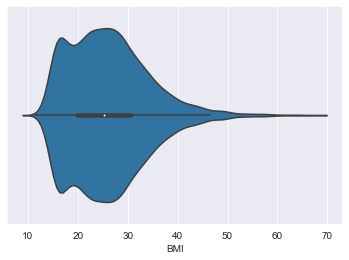

In [89]:
sns.violinplot(exam_trim.BMI)
plt.show()

#### Merge

In [90]:
# merge nutrient data
nutrient = nutr1_trim.join(nutr2_trim)
print(nutrient.shape)
nutrient.head()

(9544, 38)


,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,92670.70,69945.93,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00
83733.00,16454.11,13190.27,1.00,0,0,0,0,0,0,0,0,0,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1.00,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00
83734.00,6529.62,4928.42,1.00,1,0,0,0,0,0,0,0,0,0,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1.00,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00
83735.00,58191.54,0.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
83736.00,12358.09,9813.68,1.00,0,0,0,0,0,0,0,0,0,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1.00,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00


In [91]:
nutrient.describe()

,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2
count,9544.00,8506.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,9544.00,8327.00,8327.00,8327.00,8327.00,8327.00,8327.00,8327.00,8327.00,8327.00,8327.00,8327.00,9544.00,6875.00,6875.00,6875.00,6875.00,6875.00,6875.00,6875.00,6875.00,6875.00,6875.00,6875.00
mean,33160.21,37206.80,1.46,0.05,0.02,0.04,0.02,0.00,0.00,0.11,0.02,0.06,0.02,0.02,0.01,1947.64,73.36,237.65,103.59,15.46,76.27,25.45,26.51,17.38,270.26,189.38,2.09,1806.80,71.19,222.49,95.63,15.43,70.15,23.42,24.35,15.91,259.21,185.27
std,44206.32,55191.92,1.24,0.22,0.22,0.34,0.28,0.07,0.16,0.86,0.44,0.74,0.43,0.42,0.27,928.99,40.73,117.05,66.67,10.13,44.02,16.04,16.16,11.90,234.26,136.79,1.76,854.12,38.48,109.84,60.53,10.11,40.88,14.93,15.27,10.87,217.23,133.82
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9954.48,7102.41,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1309.00,46.09,156.41,58.56,8.60,45.22,14.36,15.23,9.15,114.00,99.00,1.00,1224.50,45.03,146.36,54.34,8.40,41.95,13.14,13.76,8.41,113.00,98.00
50%,18477.21,17733.84,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1805.00,66.03,219.98,90.42,13.40,67.76,22.07,23.33,14.74,201.00,158.00,1.00,1675.00,64.72,205.68,84.40,13.40,61.85,20.07,21.05,13.35,197.00,154.00
75%,39501.81,46802.08,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2402.50,92.02,294.26,133.53,19.90,97.50,32.81,34.03,22.40,358.00,243.00,5.00,2246.50,90.11,280.30,123.42,20.10,89.92,30.24,31.33,20.59,345.00,235.00
max,454277.72,579148.96,5.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,5.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00


In [92]:
# merge lab data
lab_data = ghg.join([ogtt, insl, gluc])
lab_data.head()

,LBXGH,ogtt_complete,known_diabetic,two_hr_gluc,insulin_complete,insulin,fast_glucose
SEQN,,,,,,,
83732.00,7.00,nan,nan,nan,nan,nan,nan
83733.00,5.50,0.00,0.00,nan,1.00,17.26,101.00
83734.00,5.80,1.00,0.00,156.00,1.00,11.77,84.00
83735.00,5.60,nan,nan,nan,nan,nan,nan
83736.00,5.60,0.00,0.00,nan,1.00,5.42,84.00


In [93]:
lab_data['glycohemoglobin'] = lab_data.LBXGH
lab_data.drop('LBXGH', axis=1, inplace=True)
lab_data.head()

,ogtt_complete,known_diabetic,two_hr_gluc,insulin_complete,insulin,fast_glucose,glycohemoglobin
SEQN,,,,,,,
83732.00,nan,nan,nan,nan,nan,nan,7.00
83733.00,0.00,0.00,nan,1.00,17.26,101.00,5.50
83734.00,1.00,0.00,156.00,1.00,11.77,84.00,5.80
83735.00,nan,nan,nan,nan,nan,nan,5.60
83736.00,0.00,0.00,nan,1.00,5.42,84.00,5.60


In [94]:
lab_data.shape

(6744, 7)

In [95]:
lab_data.describe()

,ogtt_complete,known_diabetic,two_hr_gluc,insulin_complete,insulin,fast_glucose,glycohemoglobin
count,2713.00,2713.00,2084.00,3191.00,2921.00,2972.00,6326.00
mean,0.77,0.12,119.49,0.76,14.46,110.61,5.75
std,0.42,0.32,49.59,0.43,19.68,38.61,1.10
min,0.00,0.00,35.00,0.00,0.71,21.00,3.80
25%,1.00,0.00,90.00,1.00,6.19,94.00,5.20
50%,1.00,0.00,108.00,1.00,9.76,101.00,5.50
75%,1.00,0.00,136.00,1.00,15.58,111.00,5.80
max,1.00,1.00,542.00,1.00,324.06,479.00,17.00


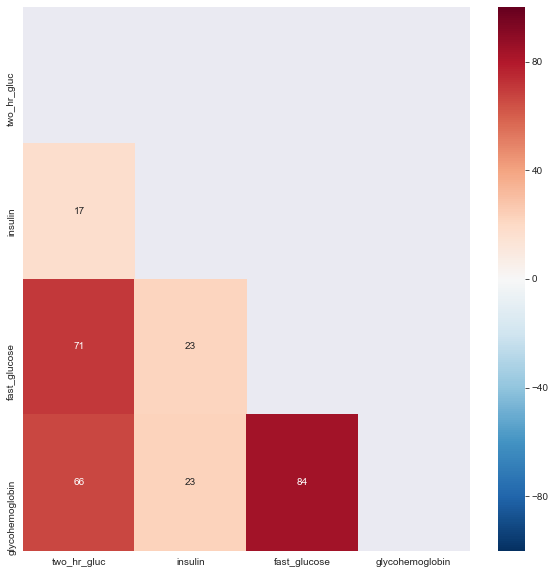

In [96]:
results_df = lab_data[['two_hr_gluc', 'insulin', 'fast_glucose', 'glycohemoglobin']]
# plot heatmap of test results
plt.figure(figsize=(10,10))
lab_corr = results_df.corr()
mask = np.zeros_like(lab_corr)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(lab_corr*100,
           vmax=100,
           vmin=-100,
           cmap='RdBu_r',
           mask=mask,
           annot=True,
           fmt='.0f')
plt.show()

In [97]:
# since Glycohemoglobin has the most complete record, 
# and is robust against short fasting time, it's the first feature
# to indicate (pre)diabetes.
# next in line would be Oral Glucose Tolerance Test, then fasting
# glucose.

# a participant is considered (pre)diabetic if
# positive in anyone of the three tests above

# fasting insulin is not used as indicator since there is no agree
# upon metrics to indicate pre-diabetes

In [98]:
# drop insulin
lab_data.drop(['insulin_complete', 'insulin'], axis=1, inplace=True)
lab_data.head()

,ogtt_complete,known_diabetic,two_hr_gluc,fast_glucose,glycohemoglobin
SEQN,,,,,
83732.00,nan,nan,nan,nan,7.00
83733.00,0.00,0.00,nan,101.00,5.50
83734.00,1.00,0.00,156.00,84.00,5.80
83735.00,nan,nan,nan,nan,5.60
83736.00,0.00,0.00,nan,84.00,5.60


In [99]:
lab_data.ogtt_complete.fillna(0, inplace=True)
lab_data.ogtt_complete = lab_data.ogtt_complete.astype(int)
lab_data.known_diabetic.fillna(0, inplace=True)
lab_data.known_diabetic = lab_data.known_diabetic.astype(int)
lab_data.head()

,ogtt_complete,known_diabetic,two_hr_gluc,fast_glucose,glycohemoglobin
SEQN,,,,,
83732.00,0,0,nan,nan,7.00
83733.00,0,0,nan,101.00,5.50
83734.00,1,0,156.00,84.00,5.80
83735.00,0,0,nan,nan,5.60
83736.00,0,0,nan,84.00,5.60


In [100]:
# keep records that have at least one test results
print('lab data', lab_data.shape)
tested_data = lab_data[(lab_data.ogtt_complete == 1) | (lab_data.fast_glucose.notnull()) | (lab_data.glycohemoglobin.notnull())]
print('tested', tested_data.shape)

lab data (6744, 5)
tested (6328, 5)


In [101]:
for feature in ['two_hr_gluc', 'fast_glucose', 'glycohemoglobin']:
    tested_data[feature].fillna(0, inplace=True)
tested_data.head()

C:\Users\const\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,ogtt_complete,known_diabetic,two_hr_gluc,fast_glucose,glycohemoglobin
SEQN,,,,,
83732.00,0,0,0.00,0.00,7.00
83733.00,0,0,0.00,101.00,5.50
83734.00,1,0,156.00,84.00,5.80
83735.00,0,0,0.00,0.00,5.60
83736.00,0,0,0.00,84.00,5.60


In [102]:
tested = tested_data.drop('ogtt_complete', axis=1)
tested.head()

,known_diabetic,two_hr_gluc,fast_glucose,glycohemoglobin
SEQN,,,,
83732.00,0,0.00,0.00,7.00
83733.00,0,0.00,101.00,5.50
83734.00,0,156.00,84.00,5.80
83735.00,0,0.00,0.00,5.60
83736.00,0,0.00,84.00,5.60


In [103]:
tested['ogtt_positive'] = (tested.two_hr_gluc > 140).astype(int)
tested['fast_gluc_positive'] = (tested.fast_glucose > 100).astype(int)
tested['glyc_hgb_positive'] = (tested.glycohemoglobin > 5.6).astype(int)
tested['(pre)diabetic'] = (tested.known_diabetic | tested.fast_gluc_positive | tested.glyc_hgb_positive)
tested.head()

,known_diabetic,two_hr_gluc,fast_glucose,glycohemoglobin,ogtt_positive,fast_gluc_positive,glyc_hgb_positive,(pre)diabetic
SEQN,,,,,,,,
83732.00,0,0.00,0.00,7.00,0,0,1,1
83733.00,0,0.00,101.00,5.50,0,1,0,1
83734.00,0,156.00,84.00,5.80,1,0,1,1
83735.00,0,0.00,0.00,5.60,0,0,0,0
83736.00,0,0.00,84.00,5.60,0,0,0,0


In [104]:
tested.describe()

,known_diabetic,two_hr_gluc,fast_glucose,glycohemoglobin,ogtt_positive,fast_gluc_positive,glyc_hgb_positive,(pre)diabetic
count,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00
mean,0.05,39.35,51.95,5.74,0.07,0.24,0.37,0.47
std,0.22,62.96,61.22,1.11,0.26,0.43,0.48,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,5.20,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,5.50,0.00,0.00,0.00,0.00
75%,0.00,90.00,100.00,5.80,0.00,0.00,1.00,1.00
max,1.00,542.00,479.00,17.00,1.00,1.00,1.00,1.00


In [105]:
# finalize the target variable, while keeping known_diabetic 
# (to remove noise of correlation in the future)
target = tested[['(pre)diabetic', 'known_diabetic']]
target.head()

,(pre)diabetic,known_diabetic
SEQN,,
83732.00,1,0
83733.00,1,0
83734.00,1,0
83735.00,0,0
83736.00,0,0


In [106]:
target.shape

(6328, 2)

In [107]:
# merge all data
df = demo.join([nutrient, exam_trim, target])
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,(pre)diabetic,known_diabetic
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,1.00,0.00
83733.00,1,53,white,16454.11,13190.27,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1.00,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,1.00,0.00
83734.00,1,78,white,6529.62,4928.42,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1.00,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,1.00,0.00
83735.00,2,56,white,58191.54,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42.40,0.00,0.00
83736.00,2,42,black,12358.09,9813.68,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1.00,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0.00,0.00


In [108]:
df['pre_diabetic'] = df['(pre)diabetic']
df.drop('(pre)diabetic', axis=1, inplace=True)
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1.00,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,0.00,1.00
83733.00,1,53,white,16454.11,13190.27,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1.00,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,0.00,1.00
83734.00,1,78,white,6529.62,4928.42,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1.00,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,0.00,1.00
83735.00,2,56,white,58191.54,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42.40,0.00,0.00
83736.00,2,42,black,12358.09,9813.68,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1.00,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0.00,0.00


In [109]:
# drops all that doesn't have target variable
df = df[df.pre_diabetic.notnull()]
df.describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic
count,6328.00,6328.00,6328.00,5897.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,6328.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,6260.00,6328.00,6328.00
mean,1.51,43.53,40522.84,43522.68,1.25,0.07,0.03,0.05,0.03,0.00,0.01,0.16,0.03,0.09,0.03,0.01,0.01,2070.69,79.57,248.12,105.25,16.79,81.14,26.55,28.45,18.71,297.42,210.61,1.88,1900.32,76.43,230.27,96.33,16.47,73.94,24.10,25.91,17.05,284.57,202.98,28.70,0.05,0.47
std,0.50,20.66,50185.27,62200.73,0.96,0.25,0.26,0.40,0.32,0.09,0.20,1.04,0.50,0.87,0.52,0.34,0.34,951.00,42.20,120.39,70.88,10.65,46.19,16.84,17.00,12.61,245.41,142.86,1.65,887.18,40.14,114.84,65.12,10.62,42.83,15.73,16.08,11.45,229.70,141.46,7.22,0.22,0.50
min,1.00,12.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.50,0.00,0.00
25%,1.00,25.00,13181.74,8565.51,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1419.00,51.21,164.49,56.45,9.50,48.90,14.76,16.62,10.00,130.00,114.00,1.00,1284.00,48.71,149.56,51.07,9.00,43.71,13.06,14.65,9.22,124.00,108.25,23.60,0.00,0.00
50%,2.00,43.00,22173.78,20006.01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1924.00,71.83,229.66,90.61,14.50,73.09,23.11,25.32,16.02,227.00,178.00,1.00,1771.00,69.84,211.85,82.94,14.20,66.13,20.67,22.65,14.53,220.00,172.00,27.70,0.00,0.00
75%,2.00,61.00,49674.47,55363.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2549.00,99.33,305.99,137.97,21.50,103.68,34.54,36.62,24.13,397.00,269.00,1.00,2361.50,95.94,291.76,127.00,21.40,94.80,31.72,33.55,22.20,386.00,259.00,32.40,0.00,1.00
max,2.00,80.00,454277.72,579148.96,5.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,5.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00,67.30,1.00,1.00


In [110]:
# all indicator variables to integer
for feature in ['gender', 'status_1', 'status_2', 'low_cal', 'low_fat', 
                'low_salt', 'low_sugar', 'low_fiber', 'high_fiber', 'diabetic_diet',
               'mass_gain', 'low_carb', 'high_prot', 'glut_free', 'renal_diet',
               'known_diabetic', 'pre_diabetic']:
    df[feature] = df[feature].astype(int)
    
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1,0,0,0,0,0,0,0,0,0,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,0,1
83733.00,1,53,white,16454.11,13190.27,1,0,0,0,0,0,0,0,0,0,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,0,1
83734.00,1,78,white,6529.62,4928.42,1,1,0,0,0,0,0,0,0,0,0,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,0,1
83735.00,2,56,white,58191.54,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42.40,0,0
83736.00,2,42,black,12358.09,9813.68,1,0,0,0,0,0,0,0,0,0,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0


In [111]:
df.gender.replace({2:0}, inplace=True)
df.status_1.replace({2:0,
                    4:0,
                    5:0}, inplace=True)
df.status_2.replace({2:0,
                    4:0,
                    5:0}, inplace=True)
df.low_fat.replace({2:1}, inplace=True)
df.low_salt.replace({3:1}, inplace=True)
df.low_sugar.replace({4:1}, inplace=True)
df.low_fiber.replace({5:1}, inplace=True)
df.high_fiber.replace({6:1}, inplace=True)
df.diabetic_diet.replace({7:1}, inplace=True)
df.mass_gain.replace({8:1}, inplace=True)
df.low_carb.replace({9:1}, inplace=True)
df.high_prot.replace({10:1}, inplace=True)
df.glut_free.replace({11:1}, inplace=True)
df.renal_diet.replace({12:1}, inplace=True)

df.describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic
count,6328.00,6328.00,6328.00,5897.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,6328.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,5897.00,6328.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,4922.00,6260.00,6328.00,6328.00
mean,0.49,43.53,40522.84,43522.68,0.93,0.07,0.02,0.02,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,2070.69,79.57,248.12,105.25,16.79,81.14,26.55,28.45,18.71,297.42,210.61,0.78,1900.32,76.43,230.27,96.33,16.47,73.94,24.10,25.91,17.05,284.57,202.98,28.70,0.05,0.47
std,0.50,20.66,50185.27,62200.73,0.25,0.25,0.13,0.13,0.08,0.02,0.03,0.15,0.06,0.10,0.05,0.03,0.03,951.00,42.20,120.39,70.88,10.65,46.19,16.84,17.00,12.61,245.41,142.86,0.42,887.18,40.14,114.84,65.12,10.62,42.83,15.73,16.08,11.45,229.70,141.46,7.22,0.22,0.50
min,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.50,0.00,0.00
25%,0.00,25.00,13181.74,8565.51,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1419.00,51.21,164.49,56.45,9.50,48.90,14.76,16.62,10.00,130.00,114.00,1.00,1284.00,48.71,149.56,51.07,9.00,43.71,13.06,14.65,9.22,124.00,108.25,23.60,0.00,0.00
50%,0.00,43.00,22173.78,20006.01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1924.00,71.83,229.66,90.61,14.50,73.09,23.11,25.32,16.02,227.00,178.00,1.00,1771.00,69.84,211.85,82.94,14.20,66.13,20.67,22.65,14.53,220.00,172.00,27.70,0.00,0.00
75%,1.00,61.00,49674.47,55363.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2549.00,99.33,305.99,137.97,21.50,103.68,34.54,36.62,24.13,397.00,269.00,1.00,2361.50,95.94,291.76,127.00,21.40,94.80,31.72,33.55,22.20,386.00,259.00,32.40,0.00,1.00
max,1.00,80.00,454277.72,579148.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,1.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00,67.30,1.00,1.00


In [112]:
print('status 1', df.status_1.unique())
print('status 2', df.status_2.unique())

status 1 [1 0]
status 2 [1 0]


In [113]:
# drop low_quality observation about diet
df = df[(df.status_1==1) | (df.status_2==1)]
df.shape

(5897, 44)

In [114]:
df.isnull().sum()

gender              0
age                 0
race                0
weight_1            0
weight_2            0
status_1            0
low_cal             0
low_fat             0
low_salt            0
low_sugar           0
low_fiber           0
high_fiber          0
diabetic_diet       0
mass_gain           0
low_carb            0
high_prot           0
glut_free           0
renal_diet          0
energy_1            0
protein_1           0
carb_1              0
sugar_1             0
fiber_1             0
fat_1               0
satur_1             0
mono_1              0
poly_1              0
chole_1             0
folate_1            0
status_2            0
energy_2          975
protein_2         975
carb_2            975
sugar_2           975
fiber_2           975
fat_2             975
satur_2           975
mono_2            975
poly_2            975
chole_2           975
folate_2          975
BMI                51
known_diabetic      0
pre_diabetic        0
dtype: int64

In [115]:
df[df.energy_2.isnull()].describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic
count,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,975.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,968.00,975.00,975.00
mean,0.51,39.67,39603.73,0.00,1.00,0.06,0.02,0.02,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,2098.29,81.22,250.01,102.73,16.64,81.39,26.74,28.36,18.72,294.88,209.87,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,27.80,0.04,0.44
std,0.50,19.92,48220.22,0.00,0.00,0.23,0.12,0.13,0.08,0.03,0.00,0.14,0.06,0.07,0.06,0.00,0.00,1039.78,44.45,129.43,76.95,10.42,50.06,18.45,17.92,13.60,246.71,142.45,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.76,0.20,0.50
min,0.00,12.00,2917.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,14.50,0.00,0.00
25%,0.00,22.00,14822.40,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1373.50,50.88,161.22,51.12,9.20,47.13,14.07,16.08,9.73,124.00,110.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,23.00,0.00,0.00
50%,1.00,36.00,22453.29,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1900.00,72.43,225.86,85.82,14.30,72.67,23.16,24.94,15.75,217.00,172.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,26.80,0.00,0.00
75%,1.00,55.00,47712.25,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2570.50,102.16,312.42,137.83,21.25,102.41,33.93,36.67,23.71,396.50,271.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,31.30,0.00,1.00
max,1.00,80.00,394989.27,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,7624.00,289.53,1222.34,980.92,80.70,444.88,139.88,126.16,164.43,1601.00,1501.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,57.40,1.00,1.00


In [116]:
# when diet info is null in day 2, the weight_2 is all 0
# so they won't affect future calculations
for feature in ['energy_2', 'protein_2', 'carb_2', 'sugar_2',
               'fiber_2', 'fat_2', 'satur_2', 'mono_2',
               'poly_2', 'chole_2', 'folate_2']:
    df[feature].fillna(0, inplace=True)

df.isnull().sum()

gender             0
age                0
race               0
weight_1           0
weight_2           0
status_1           0
low_cal            0
low_fat            0
low_salt           0
low_sugar          0
low_fiber          0
high_fiber         0
diabetic_diet      0
mass_gain          0
low_carb           0
high_prot          0
glut_free          0
renal_diet         0
energy_1           0
protein_1          0
carb_1             0
sugar_1            0
fiber_1            0
fat_1              0
satur_1            0
mono_1             0
poly_1             0
chole_1            0
folate_1           0
status_2           0
energy_2           0
protein_2          0
carb_2             0
sugar_2            0
fiber_2            0
fat_2              0
satur_2            0
mono_2             0
poly_2             0
chole_2            0
folate_2           0
BMI               51
known_diabetic     0
pre_diabetic       0
dtype: int64

In [117]:
# mark and flag missing BMI
df['bmi_missing'] = df.BMI.isnull().astype(int)
df.BMI.fillna(0, inplace=True)
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic,bmi_missing
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1,0,0,0,0,0,0,0,0,0,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,0,1,0
83733.00,1,53,white,16454.11,13190.27,1,0,0,0,0,0,0,0,0,0,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,0,1,0
83734.00,1,78,white,6529.62,4928.42,1,1,0,0,0,0,0,0,0,0,0,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,0,1,0
83735.00,0,56,white,58191.54,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.40,0,0,0
83736.00,0,42,black,12358.09,9813.68,1,0,0,0,0,0,0,0,0,0,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0,0


In [118]:
# to decrease the noise of correlation from people already knows
# their diabetes condition, drop those obsrv.
df = df[df.known_diabetic == 0]
df.describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic,bmi_missing
count,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00,5588.00
mean,0.49,42.42,43841.75,43979.57,1.00,0.07,0.02,0.02,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,2078.61,79.79,249.42,106.30,16.78,81.21,26.63,28.44,18.69,296.78,210.84,0.83,1585.21,63.58,192.47,80.78,13.72,61.49,20.05,21.54,14.17,234.71,169.37,28.32,0.00,0.44,0.01
std,0.50,20.62,50673.90,62559.69,0.00,0.26,0.13,0.13,0.08,0.02,0.04,0.12,0.07,0.10,0.05,0.03,0.03,954.39,42.41,121.00,71.41,10.68,46.17,16.90,16.96,12.59,245.18,143.46,0.37,1079.96,46.51,136.12,69.94,11.54,47.94,16.96,17.63,12.27,233.42,150.76,7.58,0.00,0.50,0.09
min,0.00,12.00,2917.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,24.00,14885.76,8639.84,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1424.00,51.33,165.45,57.14,9.50,48.95,14.79,16.61,9.97,130.00,114.00,1.00,907.75,32.88,104.39,28.88,5.50,27.66,7.66,9.10,5.54,68.00,68.00,23.30,0.00,0.00,0.00
50%,0.00,41.00,24390.16,20250.13,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1932.50,72.02,230.86,91.99,14.50,73.24,23.17,25.33,16.02,226.00,178.00,1.00,1577.00,60.93,187.67,70.00,12.00,56.25,17.51,19.26,12.18,178.00,144.00,27.50,0.00,0.00,0.00
75%,1.00,60.00,53398.49,56058.14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2560.25,99.94,307.75,138.75,21.40,103.75,34.62,36.65,24.14,394.25,269.00,1.00,2219.00,89.87,272.29,116.57,19.70,88.40,28.80,30.69,20.16,335.00,236.00,32.20,0.00,1.00,0.00
max,1.00,80.00,454277.72,579148.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,1.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00,64.60,0.00,1.00,1.00


In [119]:
df = df[df.diabetic_diet == 0]
df.describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,diabetic_diet,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,known_diabetic,pre_diabetic,bmi_missing
count,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00
mean,0.49,42.17,43993.75,44127.62,1.00,0.07,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,2082.00,79.81,249.95,106.65,16.75,81.30,26.67,28.46,18.71,296.50,210.65,0.83,1586.06,63.64,192.69,80.96,13.71,61.47,20.05,21.53,14.18,234.41,169.05,28.27,0.00,0.43,0.01
std,0.50,20.61,50765.41,62671.23,0.00,0.26,0.13,0.13,0.07,0.02,0.04,0.00,0.07,0.10,0.05,0.03,0.03,956.31,42.51,121.16,71.53,10.65,46.24,16.93,16.98,12.61,244.87,143.32,0.37,1080.57,46.60,136.15,70.08,11.53,47.96,16.98,17.63,12.28,232.83,150.58,7.53,0.00,0.50,0.09
min,0.00,12.00,2917.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,24.00,14896.04,8654.61,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1425.00,51.25,165.80,57.57,9.50,48.98,14.84,16.62,9.96,130.00,114.00,1.00,909.00,32.89,104.49,29.05,5.50,27.66,7.67,9.06,5.54,68.00,68.00,23.30,0.00,0.00,0.00
50%,0.00,41.00,24567.71,20323.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1935.00,72.03,231.16,92.40,14.50,73.33,23.26,25.37,16.06,226.00,178.00,1.00,1577.00,60.94,187.94,70.27,12.00,56.21,17.51,19.26,12.18,178.00,144.00,27.40,0.00,0.00,0.00
75%,1.00,59.00,53827.59,56214.25,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2563.00,99.93,308.81,139.05,21.40,103.80,34.67,36.69,24.16,394.00,269.00,1.00,2219.00,89.91,272.59,116.69,19.70,88.37,28.77,30.60,20.17,334.00,235.00,32.20,0.00,1.00,0.00
max,1.00,80.00,454277.72,579148.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,1.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00,64.60,0.00,1.00,1.00


In [120]:
df.drop(['known_diabetic', 'diabetic_diet'], axis=1, inplace=True)
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_fat,low_salt,low_sugar,low_fiber,high_fiber,mass_gain,low_carb,high_prot,glut_free,renal_diet,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1,0,0,0,0,0,0,0,0,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,1,0
83733.00,1,53,white,16454.11,13190.27,1,0,0,0,0,0,0,0,0,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,1,0
83734.00,1,78,white,6529.62,4928.42,1,1,0,0,0,0,0,0,0,0,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,1,0
83735.00,0,56,white,58191.54,0.00,1,0,0,0,0,0,0,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.40,0,0
83736.00,0,42,black,12358.09,9813.68,1,0,0,0,0,0,0,0,0,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0


In [121]:
clean_df = df

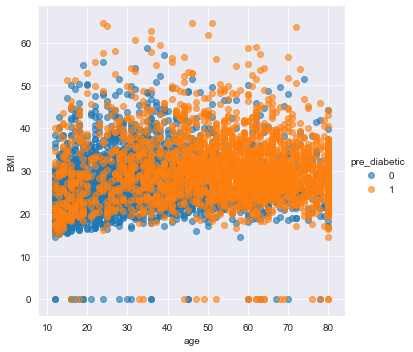

In [122]:
sns.lmplot(x='age', y='BMI', hue='pre_diabetic', 
           data=df, fit_reg=False, scatter_kws={'alpha': 0.618})
plt.show()

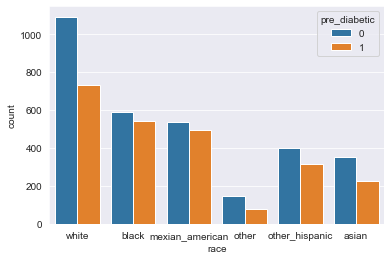

In [123]:
sns.countplot(x='race', hue='pre_diabetic', data=df)
plt.show()

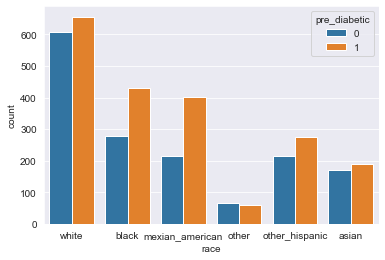

In [124]:
sns.countplot(x='race', hue='pre_diabetic', data=df[df.age > 30])
plt.show()

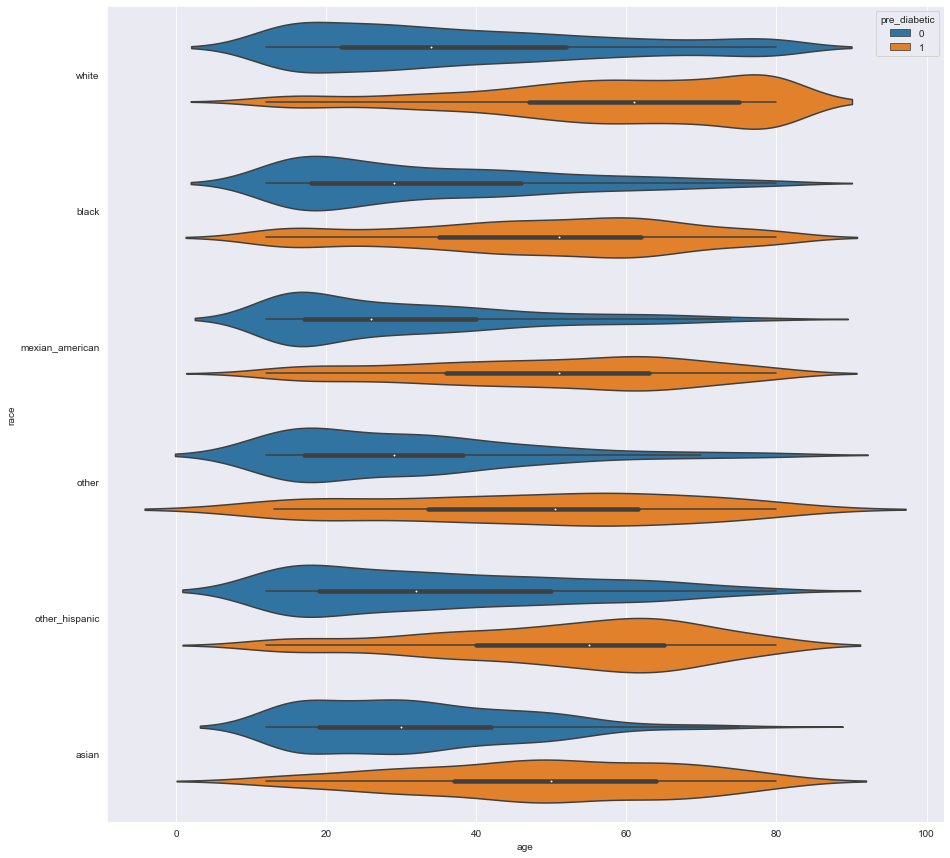

In [125]:
plt.figure(figsize=(15, 15))
sns.violinplot(y='race', x='age', hue='pre_diabetic', data=df)
plt.show()

<Figure size 1080x1080 with 0 Axes>

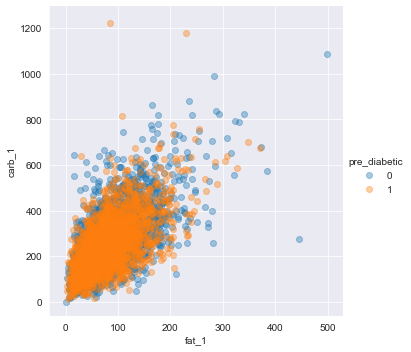

In [126]:
plt.figure(figsize=(15, 15))
sns.lmplot(x='fat_1', y='carb_1', hue='pre_diabetic', data=df, fit_reg=False, scatter_kws={'alpha':0.38})
plt.show()

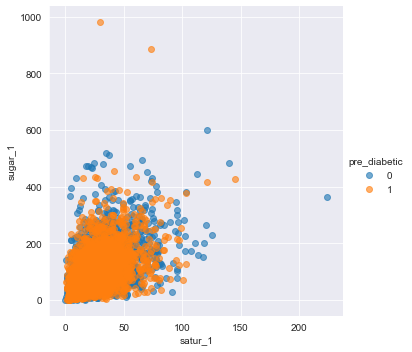

In [127]:
sns.lmplot(x='satur_1', y='sugar_1', hue='pre_diabetic', data=df, fit_reg=False, scatter_kws={'alpha':0.618})
plt.show()

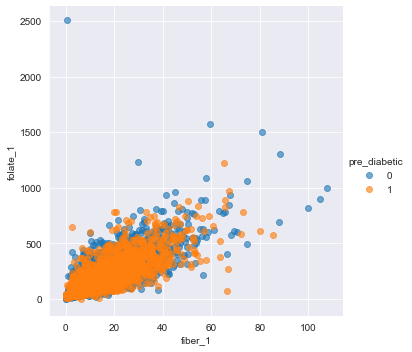

In [128]:
sns.lmplot(x='fiber_1', y='folate_1', hue='pre_diabetic', data=df, fit_reg=False, scatter_kws={'alpha':0.618})
plt.show()

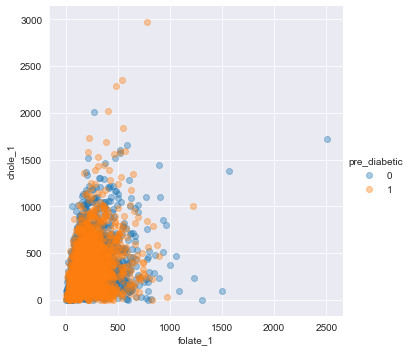

In [129]:
sns.lmplot(x='folate_1', y='chole_1', hue='pre_diabetic', data=df, fit_reg=False, scatter_kws={'alpha':0.38})
plt.show()

In [130]:
df.describe(include=['object'])

,race
count,5505
unique,6
top,white
freq,1822


In [131]:
for diet in ['low_cal', 'low_fat', 'low_salt', 'low_sugar', 'low_fiber',
            'high_fiber', 'mass_gain', 'low_carb', 'high_prot', 'glut_free',
            'renal_diet']:
    print(diet, df[diet].sum())


# low_cal            0
# low_fat            0
# low_salt           0
# low_sugar          0
# low_fiber          0
# high_fiber         0
# diabetic_diet      0
# mass_gain          0
# low_carb           0
# high_prot          0
# glut_free          0
# renal_diet  

low_cal 406
low_fat 95
low_salt 91
low_sugar 30
low_fiber 2
high_fiber 7
mass_gain 25
low_carb 53
high_prot 16
glut_free 6
renal_diet 4


In [132]:
# keep low_cal, low_salt, and low_carb diet only
# to avoid overfit
df.drop(['low_fat', 'low_sugar', 'low_fiber','high_fiber', 'mass_gain', 
         'high_prot', 'glut_free', 'renal_diet'], axis=1, inplace=True)
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,1,0
83733.00,1,53,white,16454.11,13190.27,1,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,1,0
83734.00,1,78,white,6529.62,4928.42,1,1,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,1,0
83735.00,0,56,white,58191.54,0.00,1,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.40,0,0
83736.00,0,42,black,12358.09,9813.68,1,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0


In [133]:
df.shape

(5505, 35)

In [134]:
clean_df = df.copy()

In [135]:
df.describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing
count,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00,5505.00
mean,0.49,42.17,43993.75,44127.62,1.00,0.07,0.02,0.01,2082.00,79.81,249.95,106.65,16.75,81.30,26.67,28.46,18.71,296.50,210.65,0.83,1586.06,63.64,192.69,80.96,13.71,61.47,20.05,21.53,14.18,234.41,169.05,28.27,0.43,0.01
std,0.50,20.61,50765.41,62671.23,0.00,0.26,0.13,0.10,956.31,42.51,121.16,71.53,10.65,46.24,16.93,16.98,12.61,244.87,143.32,0.37,1080.57,46.60,136.15,70.08,11.53,47.96,16.98,17.63,12.28,232.83,150.58,7.53,0.50,0.09
min,0.00,12.00,2917.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,24.00,14896.04,8654.61,1.00,0.00,0.00,0.00,1425.00,51.25,165.80,57.57,9.50,48.98,14.84,16.62,9.96,130.00,114.00,1.00,909.00,32.89,104.49,29.05,5.50,27.66,7.67,9.06,5.54,68.00,68.00,23.30,0.00,0.00
50%,0.00,41.00,24567.71,20323.70,1.00,0.00,0.00,0.00,1935.00,72.03,231.16,92.40,14.50,73.33,23.26,25.37,16.06,226.00,178.00,1.00,1577.00,60.94,187.94,70.27,12.00,56.21,17.51,19.26,12.18,178.00,144.00,27.40,0.00,0.00
75%,1.00,59.00,53827.59,56214.25,1.00,0.00,0.00,0.00,2563.00,99.93,308.81,139.05,21.40,103.80,34.67,36.69,24.16,394.00,269.00,1.00,2219.00,89.91,272.59,116.69,19.70,88.37,28.77,30.60,20.17,334.00,235.00,32.20,1.00,0.00
max,1.00,80.00,454277.72,579148.96,1.00,1.00,1.00,1.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,1.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00,64.60,1.00,1.00


In [136]:
# drop the outlier with no info
df = df[(df.energy_1>1) | (df.energy_2>1)]
df.shape

(5504, 35)

In [137]:
df.describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing
count,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00
mean,0.49,42.18,43999.42,44135.63,1.00,0.07,0.02,0.01,2082.37,79.83,249.99,106.67,16.75,81.31,26.68,28.47,18.72,296.55,210.69,0.83,1586.34,63.65,192.72,80.98,13.71,61.48,20.05,21.53,14.18,234.45,169.08,28.27,0.43,0.01
std,0.50,20.61,50768.28,62674.10,0.00,0.26,0.13,0.10,955.99,42.50,121.13,71.53,10.65,46.23,16.92,16.98,12.61,244.86,143.30,0.37,1080.45,46.60,136.13,70.08,11.53,47.96,16.98,17.63,12.28,232.83,150.58,7.53,0.50,0.09
min,0.00,12.00,2917.50,0.00,1.00,0.00,0.00,0.00,110.00,1.02,14.03,0.33,0.00,2.92,0.51,0.52,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,24.00,14901.22,8659.62,1.00,0.00,0.00,0.00,1425.00,51.28,165.80,57.60,9.50,49.05,14.85,16.62,9.97,130.00,114.00,1.00,909.75,32.91,104.57,29.06,5.50,27.70,7.68,9.09,5.54,68.00,68.00,23.30,0.00,0.00
50%,0.00,41.00,24574.44,20324.52,1.00,0.00,0.00,0.00,1935.00,72.03,231.17,92.41,14.50,73.34,23.26,25.38,16.06,226.00,178.00,1.00,1577.50,60.94,188.00,70.29,12.00,56.22,17.51,19.26,12.18,178.00,144.00,27.40,0.00,0.00
75%,1.00,59.00,53835.59,56214.25,1.00,0.00,0.00,0.00,2563.25,99.94,308.86,139.06,21.40,103.81,34.68,36.69,24.16,394.00,269.00,1.00,2219.25,89.91,272.60,116.70,19.70,88.37,28.78,30.61,20.17,334.25,235.00,32.20,1.00,0.00
max,1.00,80.00,454277.72,579148.96,1.00,1.00,1.00,1.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,1.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00,64.60,1.00,1.00


In [138]:
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,1,0
83733.00,1,53,white,16454.11,13190.27,1,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,1,0
83734.00,1,78,white,6529.62,4928.42,1,1,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,1,0
83735.00,0,56,white,58191.54,0.00,1,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.40,0,0
83736.00,0,42,black,12358.09,9813.68,1,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0


In [139]:
df['ID'] = df.index
df.ID = df.ID.astype(int)
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing,ID
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.00,1,62,white,92670.70,69945.93,1,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,1,0,83732
83733.00,1,53,white,16454.11,13190.27,1,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,1,0,83733
83734.00,1,78,white,6529.62,4928.42,1,1,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,1,0,83734
83735.00,0,56,white,58191.54,0.00,1,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.40,0,0,83735
83736.00,0,42,black,12358.09,9813.68,1,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0,83736


In [140]:
df = df.set_index('ID')
df.head()

,gender,age,race,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,1,62,white,92670.70,69945.93,1,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,1,0
83733,1,53,white,16454.11,13190.27,1,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,1,0
83734,1,78,white,6529.62,4928.42,1,1,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,1,0
83735,0,56,white,58191.54,0.00,1,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.40,0,0
83736,0,42,black,12358.09,9813.68,1,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0


## Feature Engineering

In [141]:
# calculate the weighted means of each nutrient
weight_1 = df.weight_1 * df.status_1
weight_2 = df.weight_2 * df.status_2

In [142]:
for nutrient in ['energy', 'protein', 'carb', 'sugar', 'fiber', 'fat',
                'satur', 'mono', 'poly', 'chole', 'folate']:
    df[nutrient] = ((df['{}_1'.format(nutrient)] * weight_1) + (df['{}_2'.format(nutrient)] * weight_2))/(weight_1 + weight_2)
    
print(df.shape)
df.head()

(5504, 46)


,gender,age,race,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,1,62,white,92670.70,69945.93,1,0,0,0,1781.00,76.03,193.29,42.31,23.60,79.24,23.43,31.90,18.53,138.00,286.00,1,2744.00,133.60,281.64,118.40,15.90,121.59,40.42,42.43,26.81,635.00,235.00,27.80,1,0,2195.21,100.79,231.29,75.04,20.29,97.46,30.74,36.43,22.09,351.77,264.06
83733,1,53,white,16454.11,13190.27,1,0,0,0,2964.00,62.36,356.85,180.84,7.30,77.91,25.72,19.10,19.22,407.00,365.00,1,3971.00,165.86,223.57,34.52,12.20,154.55,32.97,61.04,47.02,773.00,403.00,30.80,1,0,3412.06,108.41,297.55,115.73,9.48,112.01,28.95,37.76,31.59,569.85,381.91
83734,1,78,white,6529.62,4928.42,1,1,0,0,2482.00,116.50,304.53,62.87,35.10,91.97,23.12,28.67,32.56,506.00,488.00,1,1928.00,93.78,194.17,94.51,17.40,90.14,39.83,30.15,10.46,326.00,117.00,28.80,1,0,2243.71,106.73,257.06,76.48,27.49,91.18,30.31,29.31,23.06,428.58,328.42
83735,0,56,white,58191.54,0.00,1,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.40,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00
83736,0,42,black,12358.09,9813.68,1,0,0,0,604.00,19.30,90.30,71.84,2.00,19.63,4.58,8.50,3.89,96.00,46.00,1,1102.00,31.29,131.83,73.63,3.10,50.88,21.94,17.85,5.94,181.00,42.00,20.30,0,0,824.43,24.61,108.68,72.63,2.49,33.46,12.26,12.64,4.80,133.62,44.23


In [143]:
df.describe()

,gender,age,weight_1,weight_2,status_1,low_cal,low_salt,low_carb,energy_1,protein_1,carb_1,sugar_1,fiber_1,fat_1,satur_1,mono_1,poly_1,chole_1,folate_1,status_2,energy_2,protein_2,carb_2,sugar_2,fiber_2,fat_2,satur_2,mono_2,poly_2,chole_2,folate_2,BMI,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate
count,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00
mean,0.49,42.18,43999.42,44135.63,1.00,0.07,0.02,0.01,2082.37,79.83,249.99,106.67,16.75,81.31,26.68,28.47,18.72,296.55,210.69,0.83,1586.34,63.65,192.72,80.98,13.71,61.48,20.05,21.53,14.18,234.45,169.08,28.27,0.43,0.01,2011.74,78.55,242.38,102.54,16.61,78.29,25.64,27.39,18.03,290.34,207.37
std,0.50,20.61,50768.28,62674.10,0.00,0.26,0.13,0.10,955.99,42.50,121.13,71.53,10.65,46.23,16.92,16.98,12.61,244.86,143.30,0.37,1080.45,46.60,136.13,70.08,11.53,47.96,16.98,17.63,12.28,232.83,150.58,7.53,0.50,0.09,832.92,36.22,105.70,61.68,9.37,39.63,14.51,14.55,10.50,201.30,124.00
min,0.00,12.00,2917.50,0.00,1.00,0.00,0.00,0.00,110.00,1.02,14.03,0.33,0.00,2.92,0.51,0.52,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.00,2.50,14.03,0.30,0.30,4.39,0.88,1.52,0.38,0.00,3.00
25%,0.00,24.00,14901.22,8659.62,1.00,0.00,0.00,0.00,1425.00,51.28,165.80,57.60,9.50,49.05,14.85,16.62,9.97,130.00,114.00,1.00,909.75,32.91,104.57,29.06,5.50,27.70,7.68,9.09,5.54,68.00,68.00,23.30,0.00,0.00,1443.42,54.19,168.22,59.54,10.05,51.27,15.56,17.43,10.90,151.26,123.93
50%,0.00,41.00,24574.44,20324.52,1.00,0.00,0.00,0.00,1935.00,72.03,231.17,92.41,14.50,73.34,23.26,25.38,16.06,226.00,178.00,1.00,1577.50,60.94,188.00,70.29,12.00,56.22,17.51,19.26,12.18,178.00,144.00,27.40,0.00,0.00,1887.02,72.42,226.62,90.90,14.77,72.16,23.03,24.97,16.12,240.74,179.85
75%,1.00,59.00,53835.59,56214.25,1.00,0.00,0.00,0.00,2563.25,99.94,308.86,139.06,21.40,103.81,34.68,36.69,24.16,394.00,269.00,1.00,2219.25,89.91,272.60,116.70,19.70,88.37,28.78,30.61,20.17,334.25,235.00,32.20,1.00,0.00,2432.05,96.06,298.08,132.58,21.10,97.86,32.36,34.51,22.73,375.60,260.22
max,1.00,80.00,454277.72,579148.96,1.00,1.00,1.00,1.00,10126.00,499.62,1222.34,980.92,107.60,498.63,223.76,169.38,164.43,2968.00,2505.00,1.00,8516.00,456.28,1188.08,655.29,131.90,463.09,151.51,173.83,137.49,2287.00,2554.00,64.60,1.00,1.00,8590.61,354.84,1222.34,980.92,88.07,444.88,188.49,159.90,164.43,1919.17,1769.06


In [144]:
for feature in ['energy', 'protein', 'carb', 'sugar', 
                'fiber', 'fat', 'satur', 'mono', 'poly', 
                'chole', 'folate', 'weight', 'status']:
    df.drop('{}_1'.format(feature), axis=1, inplace=True)
    df.drop('{}_2'.format(feature), axis=1, inplace=True)

df.head()

,gender,age,race,low_cal,low_salt,low_carb,BMI,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate
ID,,,,,,,,,,,,,,,,,,,,
83732,1,62,white,0,0,0,27.80,1,0,2195.21,100.79,231.29,75.04,20.29,97.46,30.74,36.43,22.09,351.77,264.06
83733,1,53,white,0,0,0,30.80,1,0,3412.06,108.41,297.55,115.73,9.48,112.01,28.95,37.76,31.59,569.85,381.91
83734,1,78,white,1,0,0,28.80,1,0,2243.71,106.73,257.06,76.48,27.49,91.18,30.31,29.31,23.06,428.58,328.42
83735,0,56,white,0,0,0,42.40,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00
83736,0,42,black,0,0,0,20.30,0,0,824.43,24.61,108.68,72.63,2.49,33.46,12.26,12.64,4.80,133.62,44.23


In [145]:
# glycemic impact = sugar + (sugarless, fiberless carb)^2/(sugarless carb)
# a feature to augment dietary impact on blood sugar
df['glycemic_impact'] = df.sugar + ((df.carb - df.sugar - df.fiber) ** 2)/(df.carb - df.sugar)

# according to USDA: https://www.nal.usda.gov/fnic/how-many-calories-are-one-gram-fat-carbohydrate-or-protein
# a gram of protein/carbohydrates provides roughly 4 kcal(calories)
# a gram of fat provides roughly 9 kcal(calories)

# carb energy ratio
df['carb_ratio'] = df.carb*4/df.energy

# fat energy ratio
df['fat_ratio'] = df.fat*9/df.energy
# keto-genic diet has been recommended for some patients
# to counter diabetes: we explore the possibilities here
df['satur_fat_ratio'] = df.satur/df.fat
df['satur_ratio'] = df.satur*9/df.energy
df['poly_ratio'] = df.poly*9/df.energy
df['mono_ratio'] = df.mono*9/df.energy

print(df.shape)
df.describe()

(5504, 27)


,gender,age,low_cal,low_salt,low_carb,BMI,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate,glycemic_impact,carb_ratio,fat_ratio,satur_fat_ratio,satur_ratio,poly_ratio,mono_ratio
count,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00
mean,0.49,42.18,0.07,0.02,0.01,28.27,0.43,0.01,2011.74,78.55,242.38,102.54,16.61,78.29,25.64,27.39,18.03,290.34,207.37,211.46,0.49,0.35,0.32,0.11,0.08,0.12
std,0.50,20.61,0.26,0.13,0.10,7.53,0.50,0.09,832.92,36.22,105.70,61.68,9.37,39.63,14.51,14.55,10.50,201.30,124.00,96.14,0.10,0.08,0.07,0.03,0.03,0.03
min,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,110.00,2.50,14.03,0.30,0.30,4.39,0.88,1.52,0.38,0.00,3.00,11.52,0.10,0.06,0.09,0.01,0.01,0.02
25%,0.00,24.00,0.00,0.00,0.00,23.30,0.00,0.00,1443.42,54.19,168.22,59.54,10.05,51.27,15.56,17.43,10.90,151.26,123.93,143.96,0.42,0.30,0.28,0.09,0.06,0.10
50%,0.00,41.00,0.00,0.00,0.00,27.40,0.00,0.00,1887.02,72.42,226.62,90.90,14.77,72.16,23.03,24.97,16.12,240.74,179.85,196.52,0.49,0.35,0.32,0.11,0.08,0.12
75%,1.00,59.00,0.00,0.00,0.00,32.20,1.00,0.00,2432.05,96.06,298.08,132.58,21.10,97.86,32.36,34.51,22.73,375.60,260.22,261.10,0.55,0.40,0.37,0.13,0.10,0.14
max,1.00,80.00,1.00,1.00,1.00,64.60,1.00,1.00,8590.61,354.84,1222.34,980.92,88.07,444.88,188.49,159.90,164.43,1919.17,1769.06,1202.56,0.89,0.69,0.63,0.31,0.27,0.32


In [146]:
# BMI levels
# criteria according to: https://bmiwiki.com/bmi-chart/
# asian americans' BMI should adjusted by +2 to account for statue differences
# black americans' BMI should adjusted by -2

is_asian = (df.race=='asian').astype(int)
is_black = (df.race=='black').astype(int)
df['adjusted_bmi'] = df.BMI + 2*is_asian - 2*is_black
bmi = df.adjusted_bmi

underweight = ((bmi < 18.5) & (bmi > 5)).astype(int)
healthy = ((bmi >=18.5) & (bmi <= 25)).astype(int)
overweight = ((bmi > 25) & (bmi <=30)).astype(int)
obese = (bmi > 30).astype(int)
df['bmi_level'] = underweight + healthy*2 + overweight*3 + obese*4
df.describe()

,gender,age,low_cal,low_salt,low_carb,BMI,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate,glycemic_impact,carb_ratio,fat_ratio,satur_fat_ratio,satur_ratio,poly_ratio,mono_ratio,adjusted_bmi,bmi_level
count,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00,5504.00
mean,0.49,42.18,0.07,0.02,0.01,28.27,0.43,0.01,2011.74,78.55,242.38,102.54,16.61,78.29,25.64,27.39,18.03,290.34,207.37,211.46,0.49,0.35,0.32,0.11,0.08,0.12,28.06,2.93
std,0.50,20.61,0.26,0.13,0.10,7.53,0.50,0.09,832.92,36.22,105.70,61.68,9.37,39.63,14.51,14.55,10.50,201.30,124.00,96.14,0.10,0.08,0.07,0.03,0.03,0.03,7.45,0.94
min,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,110.00,2.50,14.03,0.30,0.30,4.39,0.88,1.52,0.38,0.00,3.00,11.52,0.10,0.06,0.09,0.01,0.01,0.02,-2.00,0.00
25%,0.00,24.00,0.00,0.00,0.00,23.30,0.00,0.00,1443.42,54.19,168.22,59.54,10.05,51.27,15.56,17.43,10.90,151.26,123.93,143.96,0.42,0.30,0.28,0.09,0.06,0.10,23.30,2.00
50%,0.00,41.00,0.00,0.00,0.00,27.40,0.00,0.00,1887.02,72.42,226.62,90.90,14.77,72.16,23.03,24.97,16.12,240.74,179.85,196.52,0.49,0.35,0.32,0.11,0.08,0.12,27.20,3.00
75%,1.00,59.00,0.00,0.00,0.00,32.20,1.00,0.00,2432.05,96.06,298.08,132.58,21.10,97.86,32.36,34.51,22.73,375.60,260.22,261.10,0.55,0.40,0.37,0.13,0.10,0.14,32.00,4.00
max,1.00,80.00,1.00,1.00,1.00,64.60,1.00,1.00,8590.61,354.84,1222.34,980.92,88.07,444.88,188.49,159.90,164.43,1919.17,1769.06,1202.56,0.89,0.69,0.63,0.31,0.27,0.32,64.50,4.00


In [147]:
df.drop('BMI', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['race'])
df.head()

,gender,age,low_cal,low_salt,low_carb,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate,glycemic_impact,carb_ratio,fat_ratio,satur_fat_ratio,satur_ratio,poly_ratio,mono_ratio,adjusted_bmi,bmi_level,race_asian,race_black,race_mexian_american,race_other,race_other_hispanic,race_white
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,1,62,0,0,0,1,0,2195.21,100.79,231.29,75.04,20.29,97.46,30.74,36.43,22.09,351.77,264.06,193.35,0.42,0.40,0.32,0.13,0.09,0.15,27.80,3,0,0,0,0,0,1
83733,1,53,0,0,0,1,0,3412.06,108.41,297.55,115.73,9.48,112.01,28.95,37.76,31.59,569.85,381.91,279.08,0.35,0.30,0.26,0.08,0.08,0.10,30.80,4,0,0,0,0,0,1
83734,1,78,1,0,0,1,0,2243.71,106.73,257.06,76.48,27.49,91.18,30.31,29.31,23.06,428.58,328.42,206.27,0.46,0.37,0.33,0.12,0.09,0.12,28.80,3,0,0,0,0,0,1
83735,0,56,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,131.89,0.47,0.33,0.36,0.12,0.06,0.12,42.40,4,0,0,0,0,0,1
83736,0,42,0,0,0,0,0,824.43,24.61,108.68,72.63,2.49,33.46,12.26,12.64,4.80,133.62,44.23,103.88,0.53,0.37,0.37,0.13,0.05,0.14,18.30,1,0,1,0,0,0,0


In [148]:
df.shape

(5504, 33)

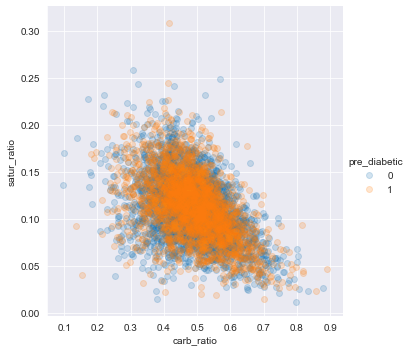

In [154]:
sns.lmplot(y='satur_ratio', x='carb_ratio', hue='pre_diabetic', data=df, 
           fit_reg=False, scatter_kws={'alpha':0.2})
plt.show()

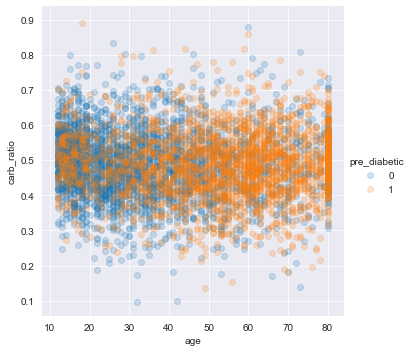

In [160]:
sns.lmplot(y='carb_ratio', x='age', hue='pre_diabetic', data=df,
          fit_reg=False, scatter_kws={'alpha':0.2})
plt.show()

<Figure size 720x720 with 0 Axes>

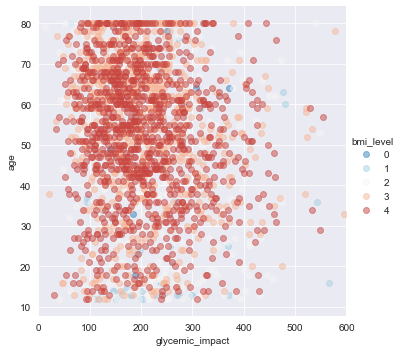

In [169]:
plt.figure(figsize=(10, 10))
sns.lmplot(y='age', x='glycemic_impact', hue='bmi_level', data=df[df.pre_diabetic==1],
          fit_reg=False, scatter_kws={'alpha':0.5}, palette='RdBu_r')
plt.xlim(0, 600)
plt.show()

<Figure size 720x720 with 0 Axes>

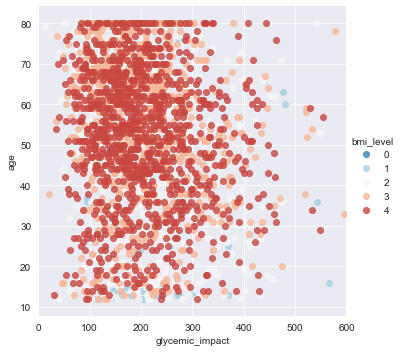

In [175]:
plt.figure(figsize=(10, 10))
sns.lmplot(y='age', x='glycemic_impact', hue='bmi_level', data=df[(df.pre_diabetic==1) & (df.adjusted_bmi>1)],
          fit_reg=False, scatter_kws={'alpha':0.8}, palette='RdBu_r')
plt.xlim(0, 600)
plt.show()

In [182]:
# age group feature
aged = df.copy()
for age_group in [10, 20, 30, 40, 50, 60, 70, 80]:
    age_str = 'g' + str(age_group)
    aged[age_str] = ((aged.age >= age_group) & (aged.age < (age_group+10))).astype(int)
aged['age_group'] = aged.g10 + 2*aged.g20 + 3*aged.g30 + 4*aged.g40 + 5*aged.g50 + 6*aged.g60 + 7*aged.g70 + 8*aged.g80
aged.drop(['g10', 'g20', 'g30', 'g40', 'g50', 'g60', 'g70', 'g80'], axis=1, inplace=True)
aged.head()

,gender,age,low_cal,low_salt,low_carb,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate,glycemic_impact,carb_ratio,fat_ratio,satur_fat_ratio,satur_ratio,poly_ratio,mono_ratio,adjusted_bmi,bmi_level,race_asian,race_black,race_mexian_american,race_other,race_other_hispanic,race_white,age_group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,1,62,0,0,0,1,0,2195.21,100.79,231.29,75.04,20.29,97.46,30.74,36.43,22.09,351.77,264.06,193.35,0.42,0.40,0.32,0.13,0.09,0.15,27.80,3,0,0,0,0,0,1,6
83733,1,53,0,0,0,1,0,3412.06,108.41,297.55,115.73,9.48,112.01,28.95,37.76,31.59,569.85,381.91,279.08,0.35,0.30,0.26,0.08,0.08,0.10,30.80,4,0,0,0,0,0,1,5
83734,1,78,1,0,0,1,0,2243.71,106.73,257.06,76.48,27.49,91.18,30.31,29.31,23.06,428.58,328.42,206.27,0.46,0.37,0.33,0.12,0.09,0.12,28.80,3,0,0,0,0,0,1,7
83735,0,56,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,131.89,0.47,0.33,0.36,0.12,0.06,0.12,42.40,4,0,0,0,0,0,1,5
83736,0,42,0,0,0,0,0,824.43,24.61,108.68,72.63,2.49,33.46,12.26,12.64,4.80,133.62,44.23,103.88,0.53,0.37,0.37,0.13,0.05,0.14,18.30,1,0,1,0,0,0,0,4


In [183]:
aged.age_group.unique()

array([6, 5, 7, 4, 2, 3, 1, 8], dtype=int64)

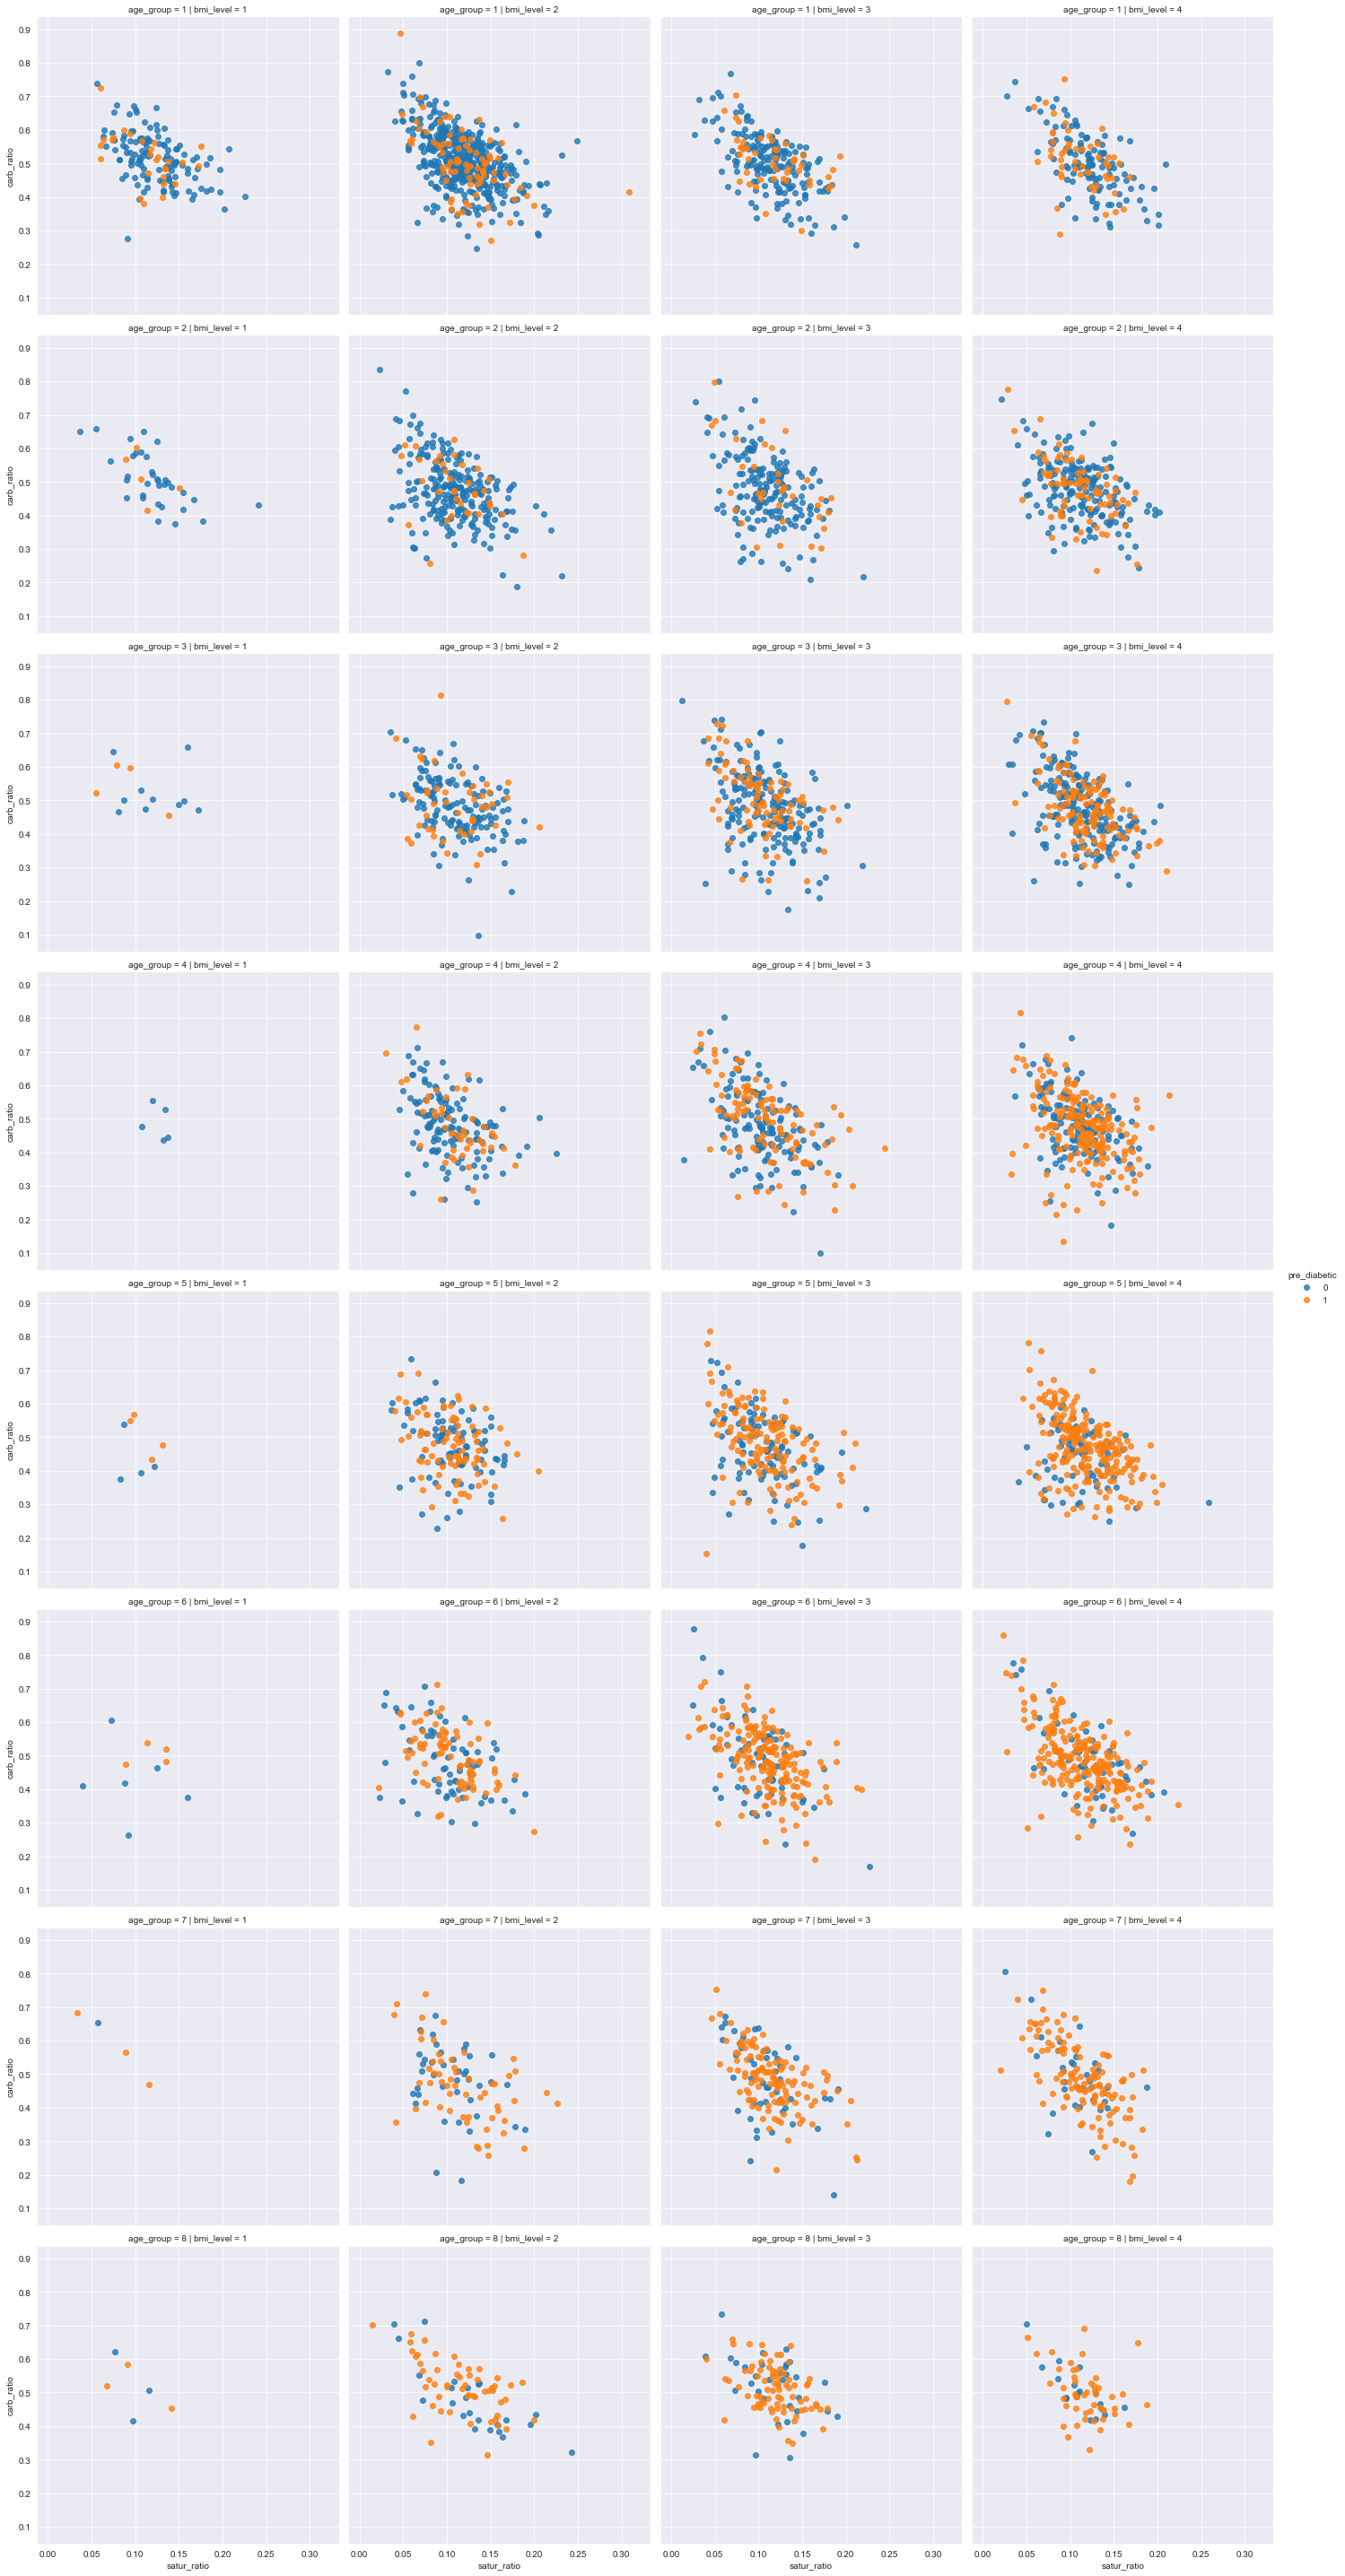

In [184]:
sns.lmplot(x='satur_ratio', y='carb_ratio',col='bmi_level', row='age_group', hue='pre_diabetic', data=aged[aged.bmi_missing == 0], fit_reg=False)
plt.show()

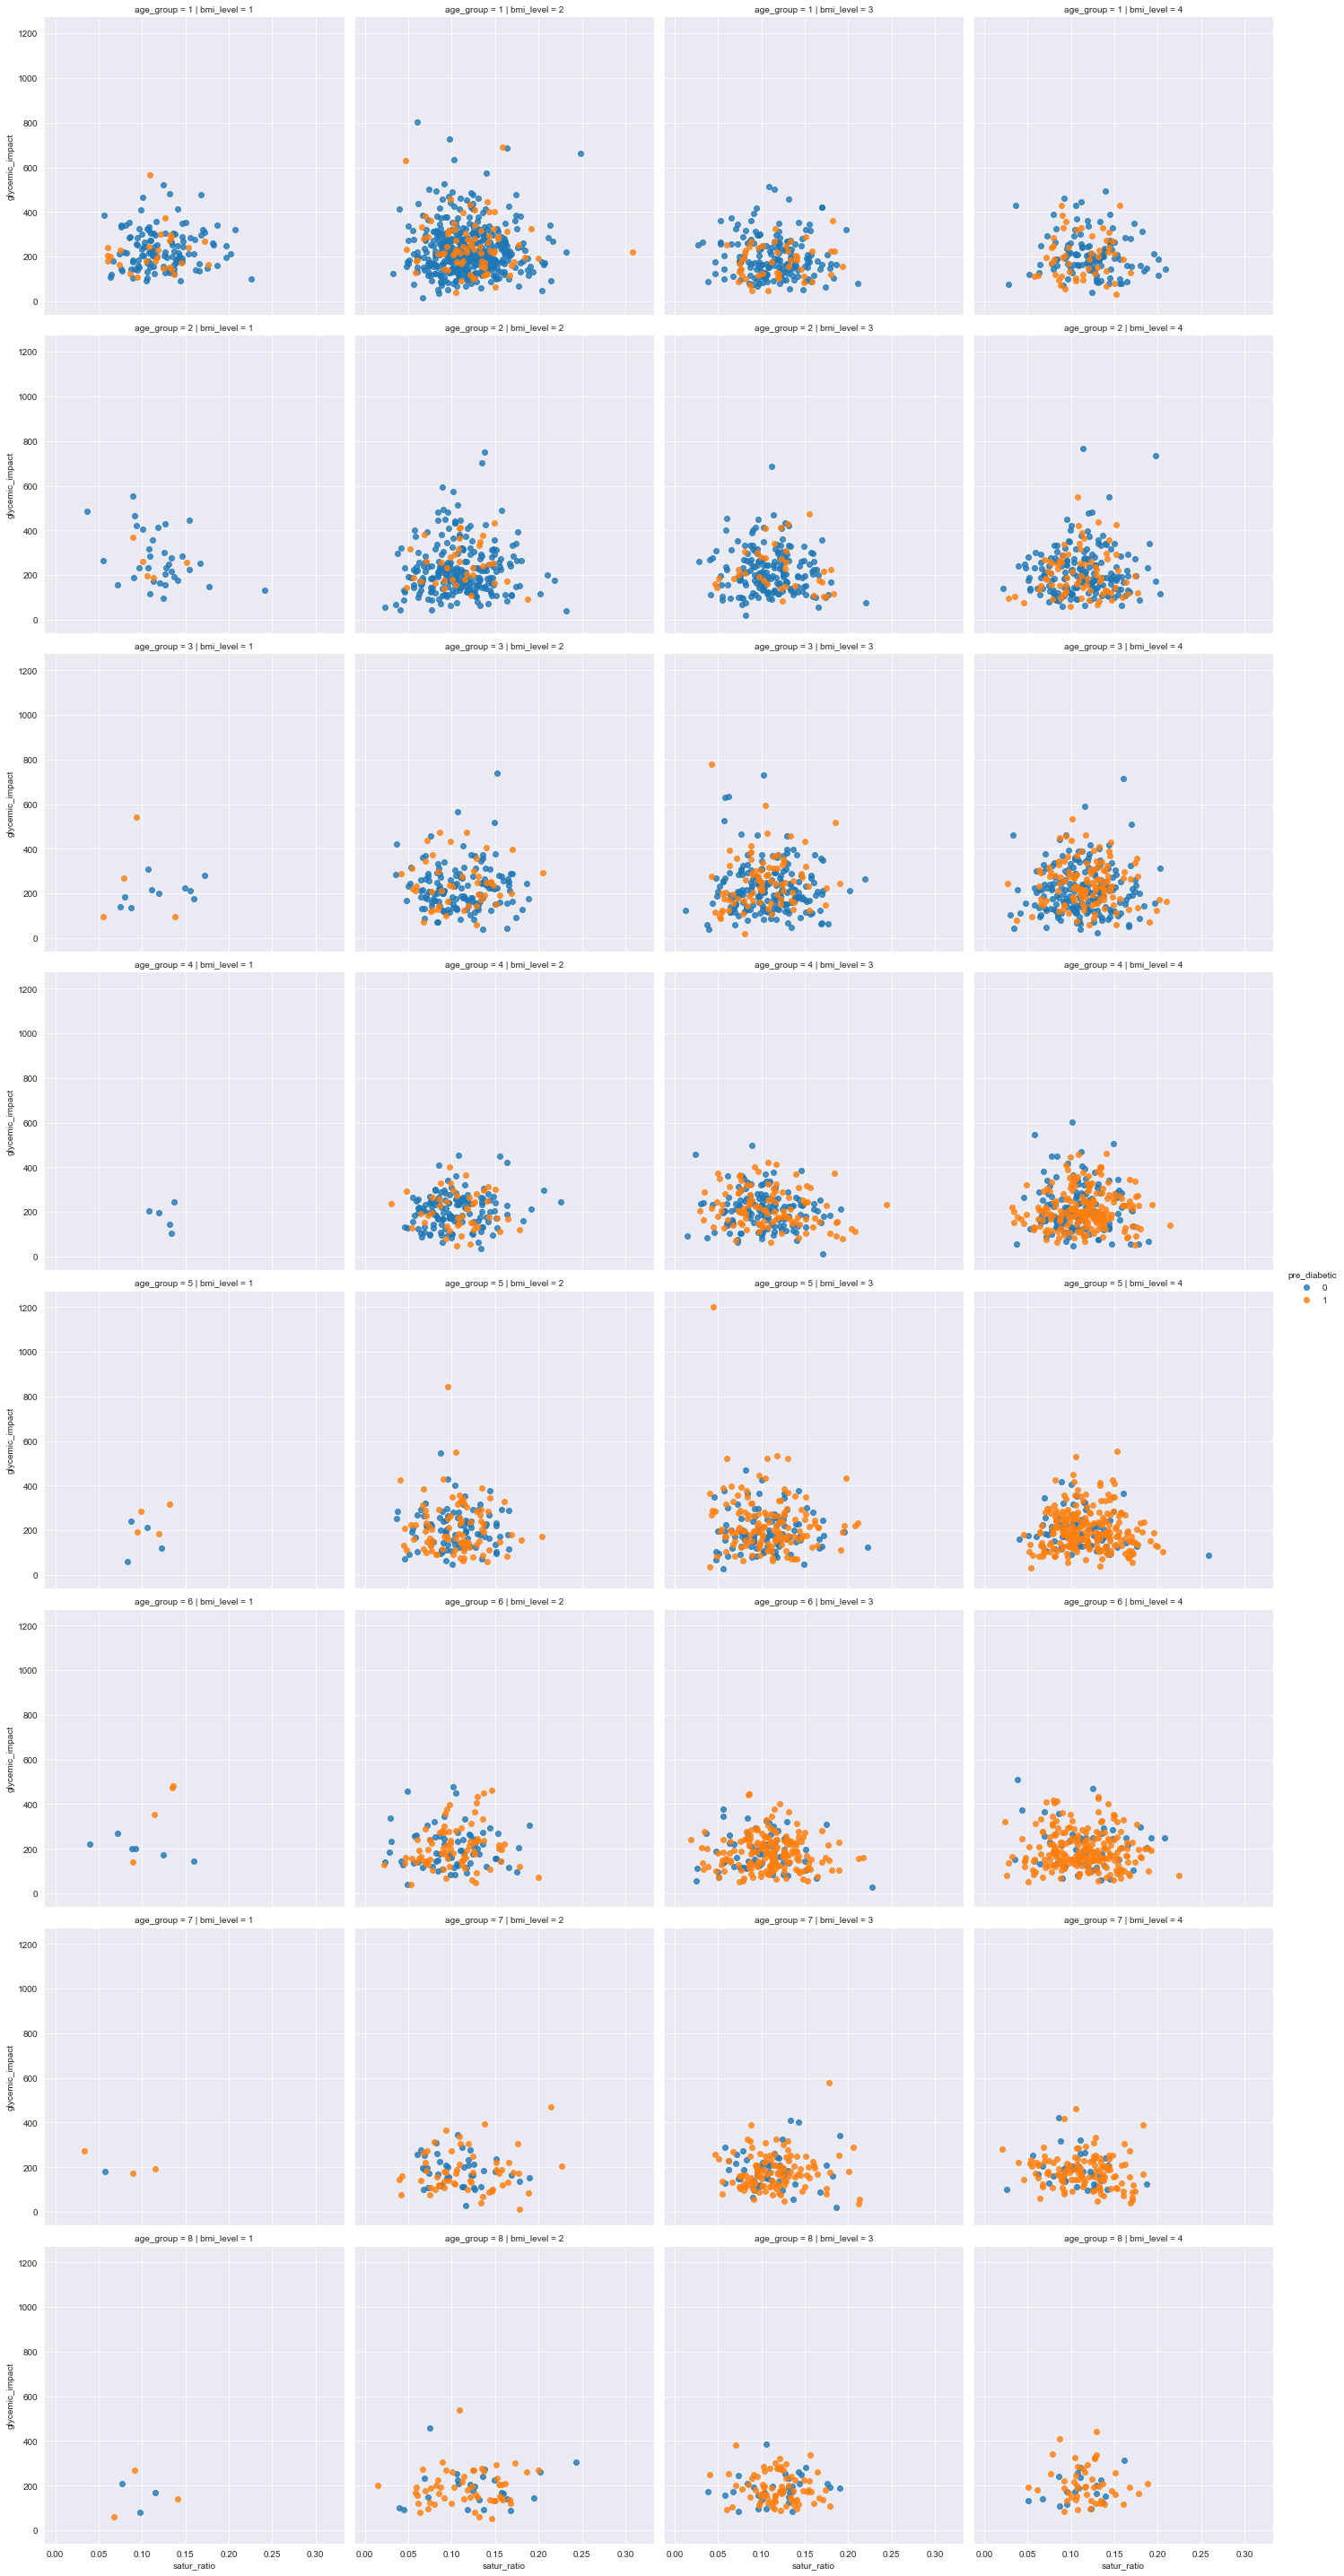

In [185]:
sns.lmplot(x='satur_ratio', y='glycemic_impact',col='bmi_level', row='age_group', hue='pre_diabetic', data=aged[aged.bmi_missing == 0], fit_reg=False)
plt.show()

no new meaningful pattern can be observed from the visualization

In [446]:
abt = df.copy()

In [447]:
abt.to_csv('abt_diabetes.csv')

In [449]:
X = df.drop('pre_diabetic', axis=1)
y = df.pre_diabetic
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=777, 
                                                    stratify=y, 
                                                    test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

4403 1101 4403 1101


In [453]:
pca_pipe = make_pipeline(StandardScaler(), PCA())

In [459]:
pca_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [460]:
X_train_pca = pca_pipe.transform(X_train)
X_test_pca = pca_pipe.transform(X_test)

In [463]:
pca_pipe[1].explained_variance_ratio_.sum()

1.0

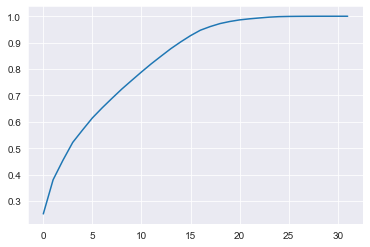

In [464]:
# cumulative explained variance
cum_explained = np.cumsum(pca_pipe[1].explained_variance_ratio_)

# plot cumulative explained variance
plt.plot(range(len(cum_explained)), cum_explained)
plt.show()

In [466]:
len(X_train_pca[0])

32

In [468]:
# due to high stake of medical/healthcare model,
# 18 features will be kept to ensure 95+% explained
# variance
pca_pipe_18 = make_pipeline(StandardScaler(), PCA(n_components=18))
pca_pipe_18.fit(X_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=18,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [471]:
X_train_pc = pca_pipe_18.transform(X_train)
X_test_pc = pca_pipe_18.transform(X_test)
pca_pipe_18[1].explained_variance_ratio_.sum()*100

96.08950876334347

In [475]:
train_df_pc = pd.DataFrame(X_train_pc)
train_df_pc.columns = ['PC{}'.format(i + 1) for i in range(X_train_pc.shape[1])]
train_df_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.35,-0.38,0.57,0.42,0.34,2.20,0.16,-0.22,0.73,-0.15,-0.64,0.04,-0.45,-0.57,-0.45,-1.30,-0.77,-0.44
1,-1.67,-0.79,-0.06,-1.36,0.04,-0.19,-0.85,2.50,-0.11,-0.78,-0.31,0.43,-0.12,-0.58,0.65,0.16,-0.07,0.44
2,1.31,0.05,-1.79,0.40,0.19,-0.81,1.58,-0.46,0.69,0.20,-0.84,0.75,0.25,0.41,0.07,-1.00,-0.44,-0.06
3,5.24,-3.07,-1.61,-1.27,-0.79,-1.41,1.93,0.14,0.08,-0.09,0.25,0.94,0.36,-0.58,0.94,0.20,-0.24,-0.66
4,-3.37,1.93,0.76,0.72,-0.09,1.42,0.63,-0.16,-0.32,-0.23,-0.05,-0.08,0.30,0.46,-0.68,1.27,-0.10,0.22


In [476]:
train_df_pc.index = X_train.index
train_df_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
ID,,,,,,,,,,,,,,,,,,
88134,0.35,-0.38,0.57,0.42,0.34,2.20,0.16,-0.22,0.73,-0.15,-0.64,0.04,-0.45,-0.57,-0.45,-1.30,-0.77,-0.44
90308,-1.67,-0.79,-0.06,-1.36,0.04,-0.19,-0.85,2.50,-0.11,-0.78,-0.31,0.43,-0.12,-0.58,0.65,0.16,-0.07,0.44
83870,1.31,0.05,-1.79,0.40,0.19,-0.81,1.58,-0.46,0.69,0.20,-0.84,0.75,0.25,0.41,0.07,-1.00,-0.44,-0.06
83854,5.24,-3.07,-1.61,-1.27,-0.79,-1.41,1.93,0.14,0.08,-0.09,0.25,0.94,0.36,-0.58,0.94,0.20,-0.24,-0.66
88072,-3.37,1.93,0.76,0.72,-0.09,1.42,0.63,-0.16,-0.32,-0.23,-0.05,-0.08,0.30,0.46,-0.68,1.27,-0.10,0.22


In [477]:
test_df_pc = pd.DataFrame(X_test_pc)
test_df_pc.columns = ['PC{}'.format(i + 1) for i in range(X_test_pc.shape[1])]
test_df_pc.index = X_test.index
test_df_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
ID,,,,,,,,,,,,,,,,,,
91622,0.36,2.06,-0.41,-2.01,-1.08,-1.32,1.87,-0.25,0.11,0.11,0.32,0.94,0.30,0.00,0.95,0.64,-0.09,-0.27
84042,0.10,1.66,1.60,0.29,0.49,2.02,-0.40,-0.45,0.96,0.01,-0.88,-0.14,-0.26,-0.06,-0.14,-0.36,-1.26,-0.42
85632,-0.75,-2.43,-0.69,0.36,-0.05,2.07,0.14,-0.36,0.73,-0.16,-1.17,0.15,-0.14,-0.27,0.28,-1.00,-0.68,0.05
85611,-1.17,-0.20,1.79,2.07,0.75,-0.57,-0.26,-0.66,-2.10,-0.92,1.62,0.36,0.95,-0.94,0.84,-0.11,-0.75,-0.36
92900,4.04,1.80,-0.40,-0.61,1.89,-0.63,1.39,-0.07,1.30,0.15,0.02,0.33,-0.89,-0.82,-0.99,-0.81,-0.34,0.54


In [478]:
train_df_pc.to_csv('train_pc.csv')
test_df_pc.to_csv('test_pc.csv')

## Algorithm Selection

### 4 algorithms are selected for this project:
* l1/l2-Regularized Logistic Regression: easy to tune and interpret. Each penalizes the size and squared size of coefficients to avoid over fitting.
* Random Forest Classifier and Gradient Boosting Classifers: both ensemble methods are high-performers. The former works great out of the box and doesn't require much tunning, while the latter have a high performance ceiling.

#### Hyperparameters to tune:

#### l1/l2-Regularized Logistic Regression:
* C (strength of penalty)

#### Random Forest Classifier and Gradient Boosting Classifers:
* n_estimators
* max_depth
* max_features
* min_samples_leaf
* learning_rate

## Model Training

In [8]:
abt = pd.read_csv('abt_diabetes.csv')
abt = abt.set_index('ID')
print(abt.shape)
abt.head()

(5504, 33)


,gender,age,low_cal,low_salt,low_carb,pre_diabetic,bmi_missing,energy,protein,carb,sugar,fiber,fat,satur,mono,poly,chole,folate,glycemic_impact,carb_ratio,fat_ratio,satur_fat_ratio,satur_ratio,poly_ratio,mono_ratio,bmi_level,adjusted_bmi,race_asian,race_black,race_mexian_american,race_other,race_other_hispanic,race_white
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,1,62,0,0,0,1,0,2195.21,100.79,231.29,75.04,20.29,97.46,30.74,36.43,22.09,351.77,264.06,193.35,0.42,0.40,0.32,0.13,0.09,0.15,3,27.80,0,0,0,0,0,1
83733,1,53,0,0,0,1,0,3412.06,108.41,297.55,115.73,9.48,112.01,28.95,37.76,31.59,569.85,381.91,279.08,0.35,0.30,0.26,0.08,0.08,0.10,4,30.80,0,0,0,0,0,1
83734,1,78,1,0,0,1,0,2243.71,106.73,257.06,76.48,27.49,91.18,30.31,29.31,23.06,428.58,328.42,206.27,0.46,0.37,0.33,0.12,0.09,0.12,3,28.80,0,0,0,0,0,1
83735,0,56,0,0,0,0,0,1340.00,70.38,157.99,54.77,14.00,49.23,17.59,18.33,9.59,138.00,110.00,131.89,0.47,0.33,0.36,0.12,0.06,0.12,4,42.40,0,0,0,0,0,1
83736,0,42,0,0,0,0,0,824.43,24.61,108.68,72.63,2.49,33.46,12.26,12.64,4.80,133.62,44.23,103.88,0.53,0.37,0.37,0.13,0.05,0.14,1,18.30,0,1,0,0,0,0


In [9]:
train_pc = pd.read_csv('train_pc.csv')
train_pc = train_pc.set_index('ID')
print(train_pc.shape)
train_pc.head()

(4403, 18)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
ID,,,,,,,,,,,,,,,,,,
88134,0.35,-0.38,0.57,0.42,0.34,2.20,0.16,-0.22,0.73,-0.15,-0.64,0.04,-0.45,-0.57,-0.45,-1.30,-0.77,-0.44
90308,-1.67,-0.79,-0.06,-1.36,0.04,-0.19,-0.85,2.50,-0.11,-0.78,-0.31,0.43,-0.12,-0.58,0.65,0.16,-0.07,0.44
83870,1.31,0.05,-1.79,0.40,0.19,-0.81,1.58,-0.46,0.69,0.20,-0.84,0.75,0.25,0.41,0.07,-1.00,-0.44,-0.06
83854,5.24,-3.07,-1.61,-1.27,-0.79,-1.41,1.93,0.14,0.08,-0.09,0.25,0.94,0.36,-0.58,0.94,0.20,-0.24,-0.66
88072,-3.37,1.93,0.76,0.72,-0.09,1.42,0.63,-0.16,-0.32,-0.23,-0.05,-0.08,0.30,0.46,-0.68,1.27,-0.10,0.22


In [10]:
test_pc = pd.read_csv('test_pc.csv')
test_pc = test_pc.set_index('ID')
print(test_pc.shape)
test_pc.head()

(1101, 18)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
ID,,,,,,,,,,,,,,,,,,
91622,0.36,2.06,-0.41,-2.01,-1.08,-1.32,1.87,-0.25,0.11,0.11,0.32,0.94,0.30,0.00,0.95,0.64,-0.09,-0.27
84042,0.10,1.66,1.60,0.29,0.49,2.02,-0.40,-0.45,0.96,0.01,-0.88,-0.14,-0.26,-0.06,-0.14,-0.36,-1.26,-0.42
85632,-0.75,-2.43,-0.69,0.36,-0.05,2.07,0.14,-0.36,0.73,-0.16,-1.17,0.15,-0.14,-0.27,0.28,-1.00,-0.68,0.05
85611,-1.17,-0.20,1.79,2.07,0.75,-0.57,-0.26,-0.66,-2.10,-0.92,1.62,0.36,0.95,-0.94,0.84,-0.11,-0.75,-0.36
92900,4.04,1.80,-0.40,-0.61,1.89,-0.63,1.39,-0.07,1.30,0.15,0.02,0.33,-0.89,-0.82,-0.99,-0.81,-0.34,0.54


In [11]:
X = abt.drop('pre_diabetic', axis=1)
y = abt.pre_diabetic
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=777, 
                                                    stratify=y, 
                                                    test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

4403 1101 4403 1101


In [18]:
# make pipelines
pipelines = {
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=777, solver='saga', max_iter=1000)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=777, solver='lbfgs', max_iter=1000)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=777)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=777))
}

In [13]:
# hyperparameters
l1_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 
                              5, 10, 50, 100, 500, 1000, 5000]
}

l2_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 
                              5, 10, 50, 100, 500, 1000, 5000]
}

rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 168, 256],
    'randomforestclassifier__max_features': ['sqrt', 0.33, 'log2'],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 8, 10]
}

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 168, 256],
    'gradientboostingclassifier__max_depth': [1, 3, 5, 7],
    'gradientboostingclassifier__max_features': ['log2', 'sqrt', 0.33, None],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2]
}

hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [19]:
# fit & tune with Cross Validation
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'successfully fitted!')
    
    model_pca = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model_pca.fit(train_pc, y_train)
    fitted_models['{}_pca'.format(name)] = model_pca
    print('{}_pca'.format(name), 'successfully fitted!')

l1 successfully fitted!
l1_pca successfully fitted!
l2 successfully fitted!
l2_pca successfully fitted!
rf successfully fitted!
rf_pca successfully fitted!
gb successfully fitted!
gb_pca successfully fitted!


In [20]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.7258687258687259
l1_pca 0.7222348398818987
l2 0.7263229616170792
l2_pca 0.7238246650011356
rf 0.7179196002725414
rf_pca 0.7061094708153531
gb 0.722007722007722
gb_pca 0.714512832159891


In [21]:
# models trained on pca data generally performed worse
# in training sets

In [28]:
for name in ['l1', 'l2', 'rf', 'gb']:
    pred = fitted_models[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    print(name, roc_auc_score(y_test, pred))
    
    pred_pca = fitted_models['{}_pca'.format(name)].predict_proba(test_pc)
    pred_pca = [p[1] for p in pred_pca]
    print('{}_pca'.format(name), roc_auc_score(y_test, pred_pca))

l1 0.7595213137665967
l1_pca 0.7581707251518572
l2 0.7598606407568671
l2_pca 0.7565916787614901
rf 0.7571493845078751
rf_pca 0.7490626511852926
gb 0.7657501478256196
gb_pca 0.7468990216631726


In [30]:
# again, pca-trained models perform slightly worse than 
# original ones

# Winning model is: gb (Gradient Boosting Classifier)

## Insights & Analysis

The winning model has a 76.7% chance to distinguishing whether a person is (pre)diabetic, based on his/her age, BMI, and dietary data from the past 1 or 2 days. In the following steps, feature importances are shown to attempt to reveal possible cause of diabetes.

In [57]:
gbc_model = fitted_models['gb'].best_estimator_.steps[1][1]
importances = gbc_model.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in gbc_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')
for f in range(X.shape[1]):
    print('%d. feature %d (%f)' % (f+1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.513056)
2. feature 25 (0.102744)
3. feature 24 (0.067048)
4. feature 21 (0.023438)
5. feature 18 (0.020970)
6. feature 0 (0.020248)
7. feature 6 (0.017879)
8. feature 31 (0.017587)
9. feature 15 (0.015873)
10. feature 12 (0.015662)
11. feature 19 (0.015657)
12. feature 17 (0.015123)
13. feature 16 (0.014989)
14. feature 8 (0.014136)
15. feature 10 (0.013943)
16. feature 14 (0.013271)
17. feature 20 (0.012968)
18. feature 23 (0.012931)
19. feature 9 (0.012404)
20. feature 22 (0.012325)
21. feature 13 (0.011140)
22. feature 7 (0.010442)
23. feature 11 (0.008580)
24. feature 27 (0.007731)
25. feature 28 (0.004081)
26. feature 3 (0.002211)
27. feature 29 (0.001500)
28. feature 26 (0.001457)
29. feature 4 (0.000248)
30. feature 5 (0.000247)
31. feature 30 (0.000110)
32. feature 2 (0.000000)


In [59]:
gbc_model = fitted_models['gb'].best_estimator_.steps[1][1]
importances = gbc_model.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in gbc_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')
for f in range(X.shape[1]):
    print('%d. %s (%f)' % (f+1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. age (0.513056)
2. adjusted_bmi (0.102744)
3. bmi_level (0.067048)
4. satur_ratio (0.023438)
5. carb_ratio (0.020970)
6. gender (0.020248)
7. energy (0.017879)
8. race_white (0.017587)
9. chole (0.015873)
10. satur (0.015662)
11. fat_ratio (0.015657)
12. glycemic_impact (0.015123)
13. folate (0.014989)
14. carb (0.014136)
15. fiber (0.013943)
16. poly (0.013271)
17. satur_fat_ratio (0.012968)
18. mono_ratio (0.012931)
19. sugar (0.012404)
20. poly_ratio (0.012325)
21. mono (0.011140)
22. protein (0.010442)
23. fat (0.008580)
24. race_black (0.007731)
25. race_mexian_american (0.004081)
26. low_salt (0.002211)
27. race_other (0.001500)
28. race_asian (0.001457)
29. low_carb (0.000248)
30. bmi_missing (0.000247)
31. race_other_hispanic (0.000110)
32. low_cal (0.000000)


As shown above, fat and carbohydrate intake are possible important features of telling 
whether a person is at risk of diabetes. BMI and age are definitely critical to the 
prediction.

Since Gradient Boosting Classifier is only marginally better than other trained models,
we will look at the remaining models to look for useful information.

In [62]:
rfc_model = fitted_models['rf'].best_estimator_.steps[1][1]
importances = rfc_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')
for f in range(X.shape[1]):
    print('%d. %s (%f)' % (f+1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. age (0.311436)
2. adjusted_bmi (0.100816)
3. bmi_level (0.044950)
4. folate (0.031113)
5. carb_ratio (0.030301)
6. satur_ratio (0.030294)
7. chole (0.030247)
8. sugar (0.029206)
9. fat_ratio (0.028721)
10. poly_ratio (0.028645)
11. satur_fat_ratio (0.028509)
12. poly (0.028249)
13. protein (0.028222)
14. mono_ratio (0.027970)
15. energy (0.027929)
16. fiber (0.027691)
17. carb (0.027038)
18. satur (0.026996)
19. glycemic_impact (0.026259)
20. fat (0.025461)
21. mono (0.024718)
22. gender (0.012616)
23. race_white (0.009247)
24. race_black (0.005584)
25. race_mexian_american (0.002819)
26. low_salt (0.001092)
27. race_asian (0.001053)
28. race_other (0.001043)
29. race_other_hispanic (0.000920)
30. low_cal (0.000582)
31. bmi_missing (0.000221)
32. low_carb (0.000050)


Echoing the results from GBC, Random Forest Classifier place various carbohydrate and fat intake features just below age and bmi on the importance scale. However, we do not know whether each feature positively or negatively shift the probability, so we turn to regression models to verify.

In [70]:
l1_model = fitted_models['l1'].best_estimator_.steps[1][1]
l1_coef = l1_model.coef_[0]
for index in range(len(l1_coef)):
    print(X_train.columns[index], round(l1_coef[index], 3))

gender 0.235
age 1.007
low_cal 0.01
low_salt 0.039
low_carb -0.027
bmi_missing 0.165
energy -0.314
protein 0.066
carb 0.227
sugar -0.086
fiber 0.008
fat 0.0
satur 0.029
mono 0.086
poly -0.21
chole 0.053
folate -0.035
glycemic_impact 0.184
carb_ratio 0.081
fat_ratio 0.123
satur_fat_ratio -0.031
satur_ratio 0.159
poly_ratio 0.131
mono_ratio -0.065
bmi_level 0.116
adjusted_bmi 0.406
race_asian 0.0
race_black 0.096
race_mexian_american 0.03
race_other -0.075
race_other_hispanic -0.042
race_white -0.266


Besides age and bmi, the sizes and signs of coefficients of important features in GBC and RFC are strangely inconsistent.

In [71]:
l2_model = fitted_models['l2'].best_estimator_.steps[1][1]
l2_coef = l2_model.coef_[0]
for index in range(len(l2_coef)):
    print(X_train.columns[index], round(l2_coef[index], 3))

gender 0.238
age 1.011
low_cal 0.011
low_salt 0.04
low_carb -0.028
bmi_missing 0.166
energy -0.628
protein 0.076
carb -0.416
sugar -0.117
fiber 0.129
fat 0.584
satur -0.195
mono 0.044
poly -0.413
chole 0.055
folate -0.032
glycemic_impact 0.963
carb_ratio 0.014
fat_ratio -0.067
satur_fat_ratio -0.055
satur_ratio 0.277
poly_ratio 0.226
mono_ratio -0.084
bmi_level 0.117
adjusted_bmi 0.408
race_asian 0.039
race_black 0.153
race_mexian_american 0.083
race_other -0.049
race_other_hispanic 0.001
race_white -0.204


Similar to l1, l2 model doesn't provide much useful information to help interpret effects of fat/carb in ensemble models. Even bmi signal seems to be buried in noise.

#### Conclusion

In summary, age and bmi are the most robust and effective features to predict risk of diabetes. Therefore, weight management is the only well-supported advice to prevent diabetes.

Though fat and carbohydrate intake potentially play important roles, the nature and size of their contributions to the development of diabetes are inconsistent in our models.

The Gradient Boosting Classifier model, with AUROC of 76.7%, has the best performance, which is closely followed by regularized logistic regression models(76%), and Random Forest Classifier (75.8%).

One of potential reasons of the models' inability to provide useful insight on diet may be caused by the method of data collection. Due to the scale of the survey, it is impractical to conduct monitored, controlled studies to collect dietary information. And the 2015-2016 survey's method of collecting dietary info relies solely on self-report, which is known to produce unreliable data and a great amount of uninterpretable variance.

Not surprisingly, the most important features in the entire dataset are age and BMI, neither has the set-backs of self-report data. Further more, given the similarity of the performances of models trained in this project, the lack of useful dietary insight is likely due to the quality of the data rather than algorithm selection. 

To collect better dietary information, a small-scale, monitored, long-term study should be conducted, ideally in healthcare/homecare settings. Alternatively, to build a better model to predict (pre)diabetic individuals, robust survey information such as waist circumference will be included.

### Citations
* https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=2015
* https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/diagnosis-treatment/drc-20351199
* https://fitness.mercola.com/sites/fitness/archive/2012/04/27/vitamin-d-and-blood-test-health-factors.aspx
* https://www.health.harvard.edu/diseases-and-conditions/glycemic-index-and-glycemic-load-for-100-foods
* https://nutritionandmetabolism.biomedcentral.com/articles/10.1186/1743-7075-5-36?wptouch_preview_theme=enabled
* https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://academy.elitedatascience.com/